In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.simplefilter("ignore")

pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 200

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

client_profile = pd.read_csv('data/client_profile.csv')
applications_history = pd.read_csv('data/applications_history.csv')
bki = pd.read_csv('data/bki.csv')
payments = pd.read_csv('data/payments.csv')

In [3]:
def corr_matrix(data, w=18, h=10):

    plt.figure(figsize = (w, h))

    sns.plotting_context(font_scale=1.4)

    corr_matrix = data.corr()
    corr_matrix = np.round(corr_matrix, 2)
    corr_matrix[np.abs(corr_matrix) < 0.1] = 0

    sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

    plt.title('Correlation matrix')
    plt.show()
    
    msno.matrix(data)
    
    msno.heatmap(data)

In [4]:
def categorical_analysis(feature_name, data, target_name='TARGET'):
    
    print(data[feature_name].value_counts())
    print(f'NaN sum = {data[feature_name].isnull().sum()}')
    print(f'NaN % = {round(data[feature_name].isnull().sum()/data.shape[0]*100, 2)}')
    print('*'*15)

    print(f'Распределение признака {feature_name} в разрезе {target_name}')

    fig, axes = plt.subplots(1, 2, figsize=(16, 4)) 
    sns.countplot(x=feature_name, hue=target_name, data=data, ax=axes[0])
    axes[0].grid()
    
    sns.pointplot(x=feature_name, y=target_name, data=data, capsize=.1, ax=axes[1])
    axes[1].grid()

In [5]:
def numerical_analysis(feature_name, data, target_name='TARGET'):

    print(f'nunique = {data[feature_name].nunique()}');
    print(f'NaN sum = {data[feature_name].isnull().sum()}')
    print(f'NaN % = {round(data[feature_name].isnull().sum()/data.shape[0]*100, 2)}')
    print('*'*15)
    
    print(f'Распределение признака {feature_name} в разрезе {target_name}')

    fig, axes = plt.subplots(1, 2, figsize=(16, 4)) 
    sns.kdeplot(data.loc[data[target_name] == 0, feature_name], label = 'target=0', ax=axes[0])
    sns.kdeplot(data.loc[data[target_name] == 1, feature_name], label = 'target=1', ax=axes[0])
    axes[0].legend(loc="best")
    axes[0].grid()

    sns.boxplot(x=data[feature_name], ax=axes[1])
    axes[1].grid()

In [6]:
def basic_analysis(data, data_name):
    
    stata.loc['Количество наблюдений', data_name] = data.shape[0]
    stata.loc['Количество признаков', data_name] = data.shape[1]
    
    for k, v in data.dtypes.value_counts().items():
        stata.loc[f'Признаков {k}', data_name] = v
        
    list_nan = [i for i in data.count() if i != data.shape[0]]
    stata.loc[f'Признаков с NaN', data_name] = len(list_nan)
    
    dict_num = {'disc': 0, 'cont': 0}
    for i in data.columns:
        if data[i].nunique() < 25:
            dict_num['disc'] += 1
        else:
            dict_num['cont'] += 1          
    stata.loc[f'Дискретных признаков', data_name] = dict_num['disc']
    stata.loc[f'Непрерывных признаков', data_name] = dict_num['cont']

In [7]:
dict_data = {'train': train, 'test': test, 'client_profile': client_profile, 'bki': bki,
             'payments': payments, 'applications_history': applications_history}

stata = pd.DataFrame(columns=dict_data.keys())

for k, v in dict_data.items():
    basic_analysis(data=v, data_name=k)

stata

,train,test,client_profile,bki,payments,applications_history
Количество наблюдений,110093,165141,250000,945234,1023932,1670214
Количество признаков,3,2,24,17,8,26
Признаков int64,2,1,6,4,3,4
Признаков object,1,1,3,3,NaN,10
Признаков с NaN,0,0,12,7,2,13
Дискретных признаков,2,1,12,4,0,10
Непрерывных признаков,1,1,12,13,8,16
Признаков float64,NaN,NaN,15,10,5,12


In [8]:
# найти общий параметр и его уникальность
feature = ''
for tr in dict_data['train'].columns:
    for cp in dict_data['client_profile'].columns:
        for bk in dict_data['bki'].columns:
            for pay in dict_data['payments'].columns:
                for ap in dict_data['applications_history'].columns:
                    if tr==cp and tr==bk and tr==pay and tr==ap:
                        feature = tr
print(f'Общий параметр: {feature}')
for k, v in dict_data.items():
    if v.shape[0] == v[feature].nunique(): 
        print(f'{k} - только уникальные')
    else:
        print(f'{k} - НЕ уникальные')

Общий параметр: APPLICATION_NUMBER
train - только уникальные
test - только уникальные
client_profile - только уникальные
bki - НЕ уникальные
payments - НЕ уникальные
applications_history - НЕ уникальные


In [9]:
app_num = train['APPLICATION_NUMBER'].to_list() + test['APPLICATION_NUMBER'].to_list()
len(app_num), len(set(app_num))

(275234, 275234)

In [10]:
cp_fool = np.isin(app_num, client_profile['APPLICATION_NUMBER'].to_list())
print(f'client_profile - {round(cp_fool.sum()/len(app_num)*100, 2)}%')

client_profile - 81.28%


In [11]:
ah_fool = np.isin(app_num, applications_history['APPLICATION_NUMBER'].to_list())
print(f'applications_history - {round(ah_fool.sum()/len(app_num)*100, 2)}%')

applications_history - 95.1%


In [12]:
bki_fool = np.isin(app_num, bki['APPLICATION_NUMBER'].to_list())
print(f'bki - {round(bki_fool.sum()/len(app_num)*100, 2)}%')

bki - 76.65%


In [13]:
pay_fool = np.isin(app_num, payments['APPLICATION_NUMBER'].to_list())
print(f'payments - {round(pay_fool.sum()/len(app_num)*100, 2)}%')

payments - 74.31%


In [14]:
train.head(3)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0,Cash
1,123597908,1,Cash
2,123526683,0,Cash


In [15]:
test.head(3)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE
0,123724268,Cash
1,123456549,Cash
2,123428178,Credit Card


#### TARGET

In [16]:
train['TARGET'].value_counts()

0    101196
1      8897
Name: TARGET, dtype: int64

In [17]:
disbalance = round(train['TARGET'].value_counts()[0] / train['TARGET'].value_counts()[1], 2)
disbalance

11.37

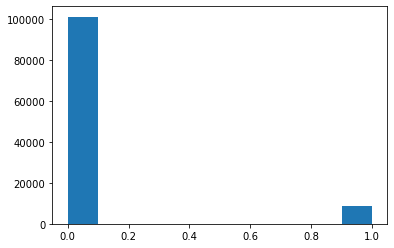

In [18]:
plt.hist(train['TARGET']);

#### NAME_CONTRACT_TYPE - тип кредита

In [19]:
feature = 'NAME_CONTRACT_TYPE'

print(f'Доля частоты {feature} - train')
print(train[feature].value_counts(normalize=True))

print(f'Доля частоты {feature} - test')
print(test[feature].value_counts(normalize=True))

Доля частоты NAME_CONTRACT_TYPE - train
Cash           0.904245
Credit Card    0.095755
Name: NAME_CONTRACT_TYPE, dtype: float64
Доля частоты NAME_CONTRACT_TYPE - test
Cash           0.904875
Credit Card    0.095125
Name: NAME_CONTRACT_TYPE, dtype: float64


In [20]:
data = pd.concat([train, test], axis=0)
data = data.reset_index(drop=True)
data.shape

(275234, 3)

# client_profile

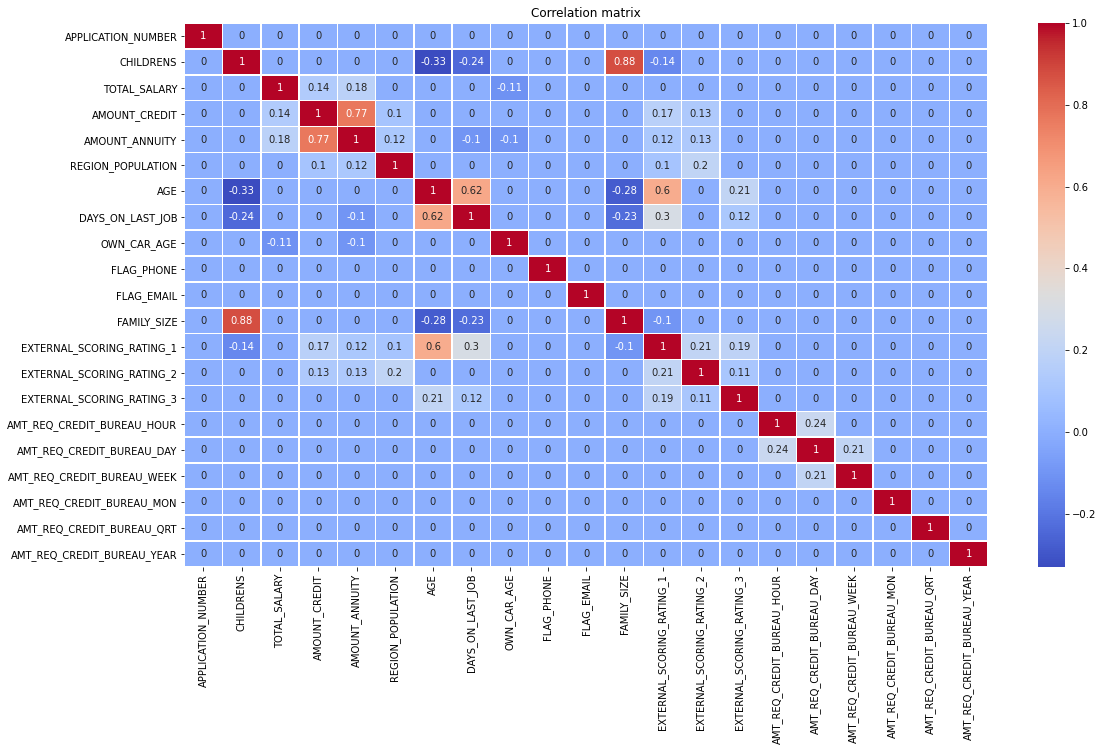

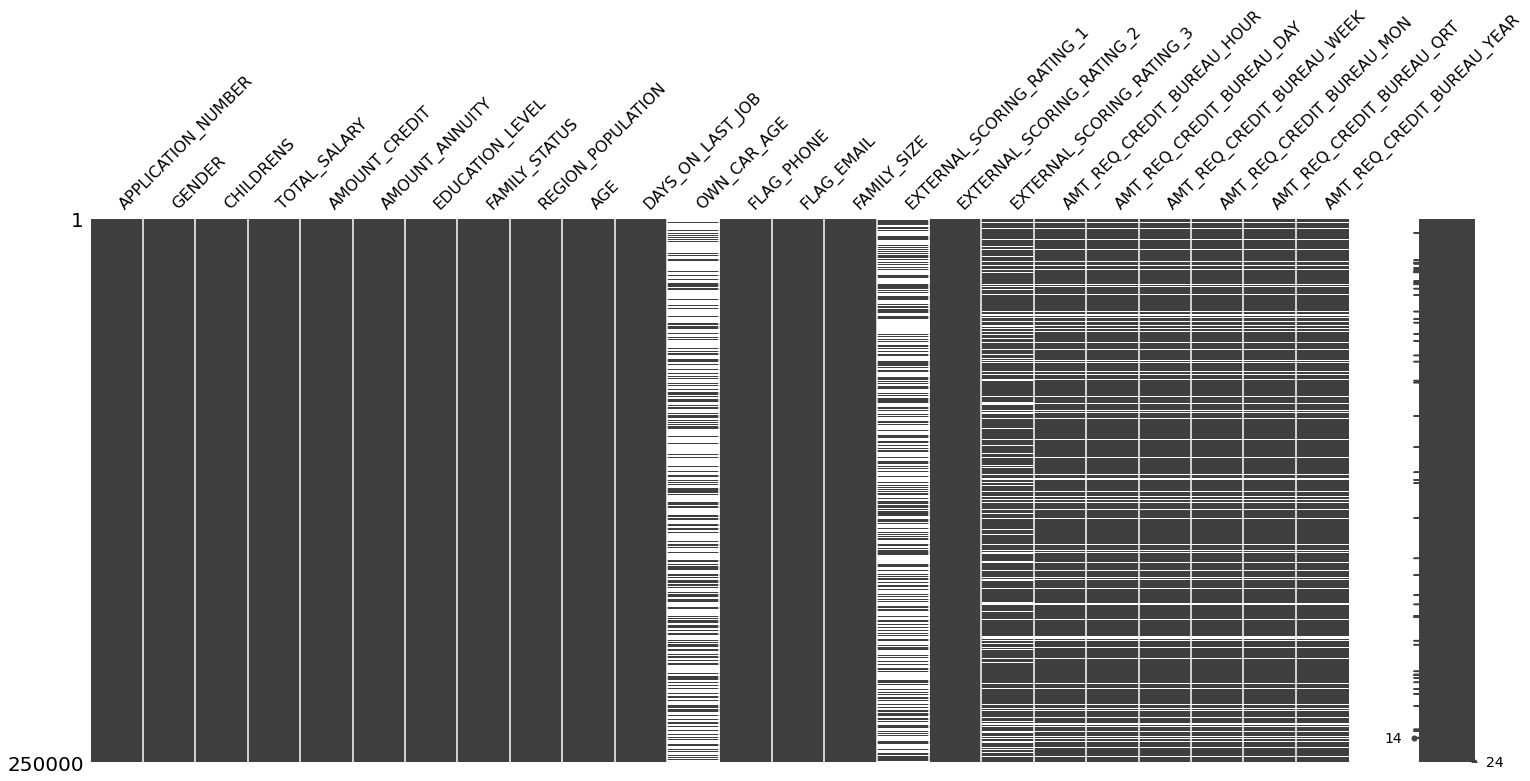

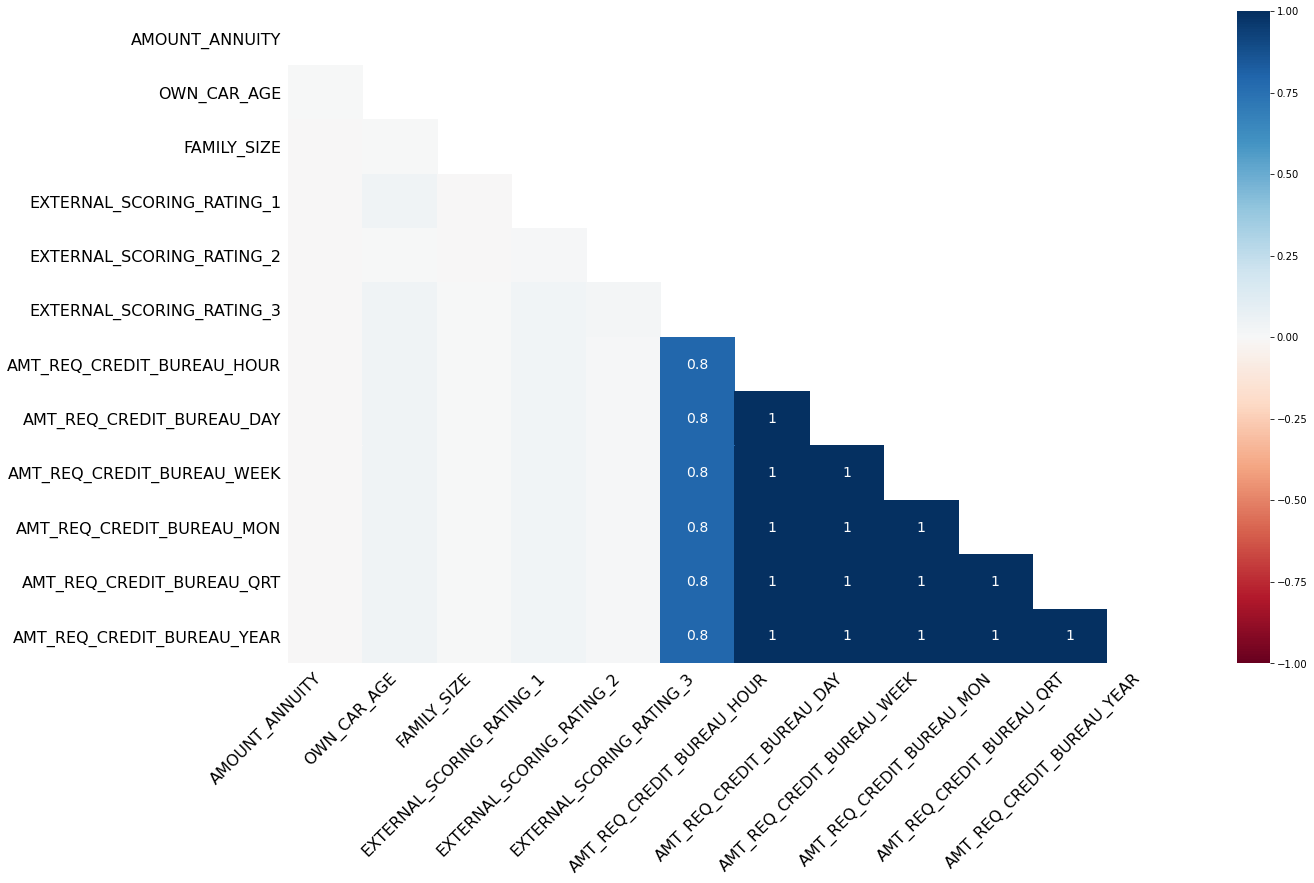

In [21]:
corr_matrix(client_profile)

In [22]:
cp = client_profile.merge(data, how='right', on='APPLICATION_NUMBER')
cp.head(3)

,APPLICATION_NUMBER,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,NAME_CONTRACT_TYPE
0,123687442,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.716570,0.0,0.0,1.0,0.0,0.0,2.0,0.0,Cash
1,123597908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Cash
2,123526683,F,0.0,135000.0,1006920.0,42660.0,Higher education,Married,0.026392,21557.0,3618.0,NaN,1.0,0.0,2.0,NaN,0.682149,0.267869,0.0,0.0,0.0,7.0,0.0,4.0,0.0,Cash


In [23]:
anatysis_result_cp = pd.DataFrame(columns=['Тип', 'NAN %', 'Выбросы', 'Вывод'])

#### NAME_CONTRACT_TYPE - тип кредита
- Cash - наличные
- Credit Card - кредитная карта

Cash           248983
Credit Card     26251
Name: NAME_CONTRACT_TYPE, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака NAME_CONTRACT_TYPE в разрезе TARGET


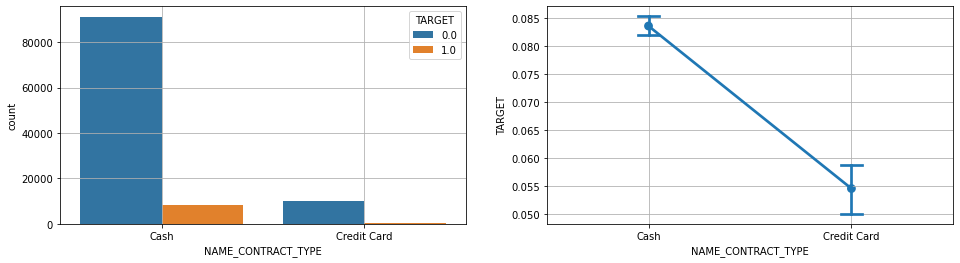

In [24]:
categorical_analysis('NAME_CONTRACT_TYPE', cp)

In [25]:
feature = 'NAME_CONTRACT_TYPE'
anatysis_result_cp.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_cp.loc[feature, 'NAN %'] = '-'
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Cash вероятность выше, Credit Card - ниже'

#### GENDER - пол
- F - женщина
- M - мужчина
- XNA - неизвестно

F      147444
M       76267
XNA         4
Name: GENDER, dtype: int64
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака GENDER в разрезе TARGET


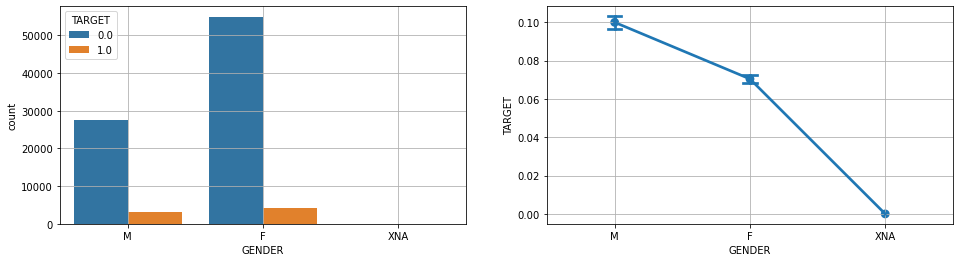

In [26]:
categorical_analysis('GENDER', cp)

F    147444
M     76267
Name: GENDER, dtype: int64
NaN sum = 51523
NaN % = 18.72
***************
Распределение признака GENDER в разрезе TARGET


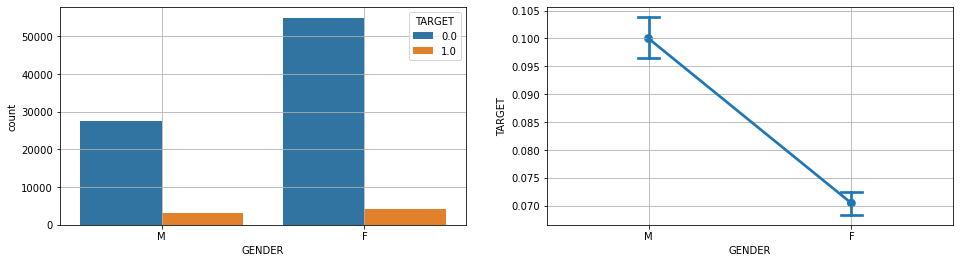

In [27]:
spam = cp.copy()
spam.loc[spam['GENDER']=='XNA', 'GENDER'] = np.nan
categorical_analysis('GENDER', spam)

In [28]:
feature = 'GENDER'
anatysis_result_cp.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = 'XNA'
anatysis_result_cp.loc[feature, 'Вывод'] = 'M вероятность выше, F - ниже'

#### CHILDRENS - дети

nunique = 14
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака CHILDRENS в разрезе TARGET


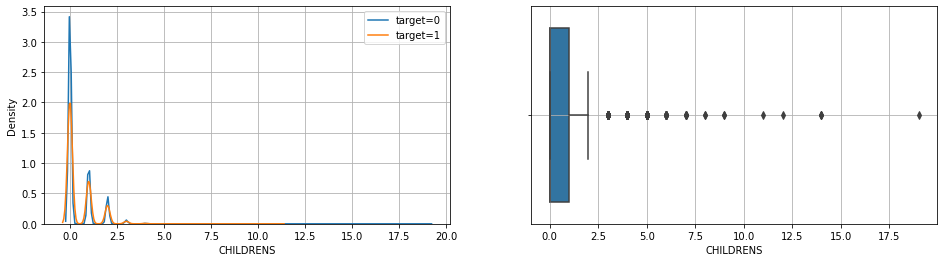

In [29]:
numerical_analysis('CHILDRENS', cp)

In [30]:
feature = 'CHILDRENS'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '>11'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### TOTAL_SALARY - суммарная заработная плата

nunique = 2023
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака TOTAL_SALARY в разрезе TARGET


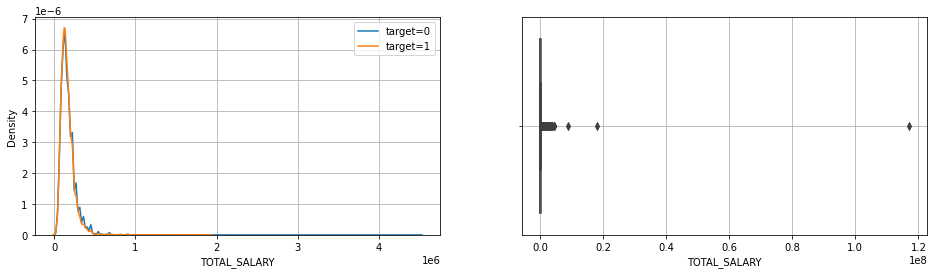

In [31]:
numerical_analysis('TOTAL_SALARY', cp)

In [32]:
feature = 'TOTAL_SALARY'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '>2 млн'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Больше 2 млн. вероятность только 0'

#### AMOUNT_CREDIT - сумма кредита

nunique = 5118
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака AMOUNT_CREDIT в разрезе TARGET


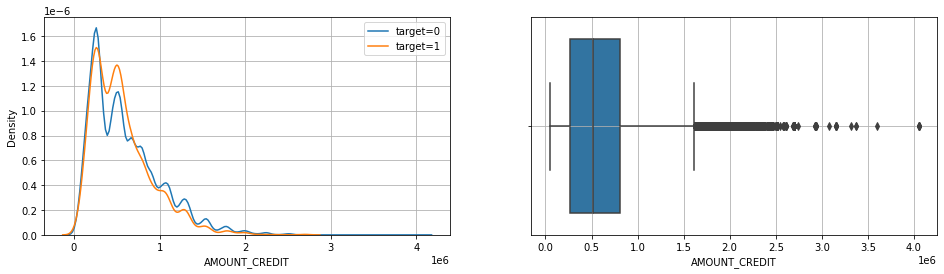

In [33]:
numerical_analysis('AMOUNT_CREDIT', cp)

In [34]:
feature = 'AMOUNT_CREDIT'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '>3 млн'
anatysis_result_cp.loc[feature, 'Вывод'] = 'В районе 600 тыс вероятность увеличина.'

#### AMOUNT_ANNUITY - сумма ежемесячного платежа

nunique = 12865
NaN sum = 51530
NaN % = 18.72
***************
Распределение признака AMOUNT_ANNUITY в разрезе TARGET


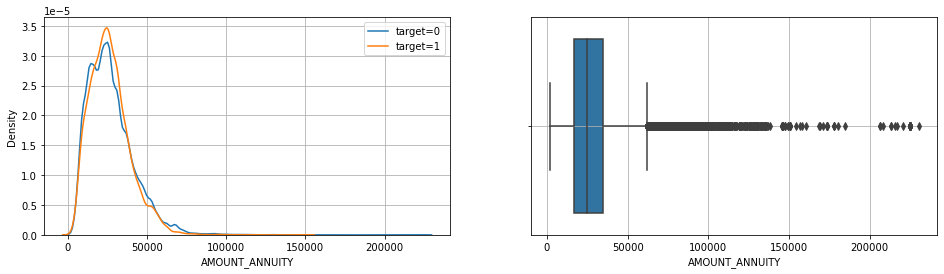

In [35]:
numerical_analysis('AMOUNT_ANNUITY', cp)

In [36]:
feature = 'AMOUNT_ANNUITY'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '>150 тыс'
anatysis_result_cp.loc[feature, 'Вывод'] = 'В районе 25 тыс вероятность увеличина.'

#### EDUCATION_LEVEL - уровень образования
- Lower secondary - неполное среднее
- Secondary / secondary special - среднее / среднее специальное
- Incomplete higher - неполное высшее
- Higher education - высшее
- Academic degree - ученая степень

Secondary / secondary special    158887
Higher education                  54516
Incomplete higher                  7456
Lower secondary                    2736
Academic degree                     120
Name: EDUCATION_LEVEL, dtype: int64
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака EDUCATION_LEVEL в разрезе TARGET


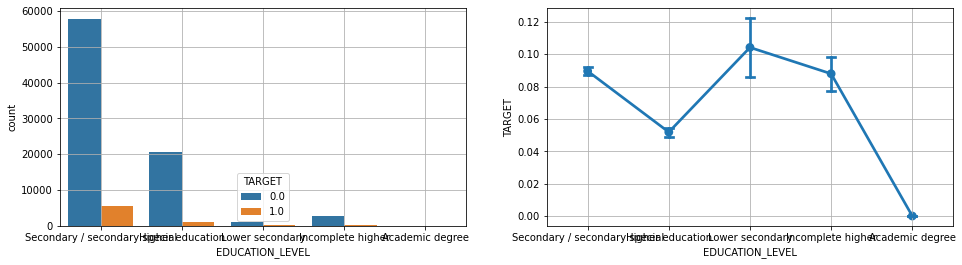

In [37]:
categorical_analysis('EDUCATION_LEVEL', cp)

1.0    158887
3.0     54516
2.0      7456
0.0      2736
4.0       120
Name: EDUCATION_LEVEL, dtype: int64
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака EDUCATION_LEVEL в разрезе TARGET


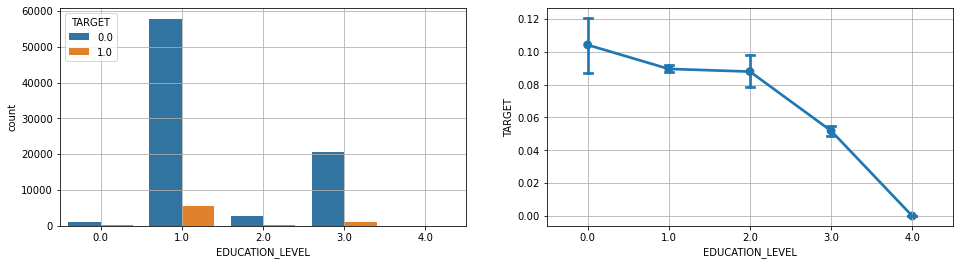

In [38]:
spam = cp.copy()
spam['EDUCATION_LEVEL'] = spam['EDUCATION_LEVEL'].map({'Lower secondary':0, \
                                         'Secondary / secondary special':1, \
                                                     'Incomplete higher':2, \
                                                      'Higher education':3, \
                                                       'Academic degree':4})
categorical_analysis('EDUCATION_LEVEL', spam)

In [40]:
feature = 'EDUCATION_LEVEL'
anatysis_result_cp.loc[feature, 'Тип'] = 'Порядковый'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Чем выше образование, тем меньше вероятность'

#### FAMILY_STATUS - семейное положение
- Married - женат / замужем
- Single / not married - не женат / не замужем
- Civil marriage - гражданский брак
- Separated - разведен / разведена
- Widow - вдовец / вдова
- Unknown - неизвестно

Married                 143149
Single / not married     32888
Civil marriage           21687
Separated                14295
Widow                    11694
Unknown                      2
Name: FAMILY_STATUS, dtype: int64
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака FAMILY_STATUS в разрезе TARGET


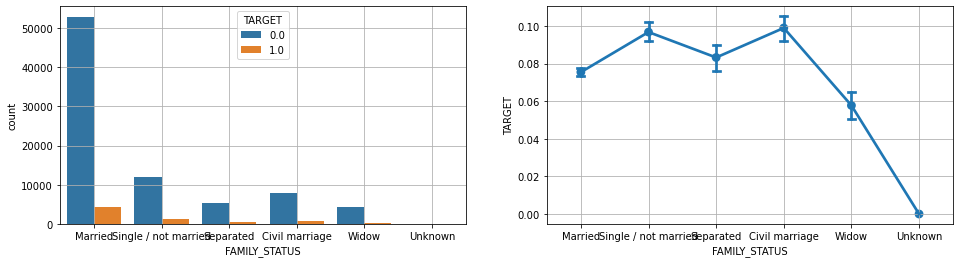

In [39]:
categorical_analysis('FAMILY_STATUS', cp)

3.0    143149
1.0     32888
0.0     21687
2.0     14295
4.0     11694
Name: FAMILY_STATUS, dtype: int64
NaN sum = 51521
NaN % = 18.72
***************
Распределение признака FAMILY_STATUS в разрезе TARGET


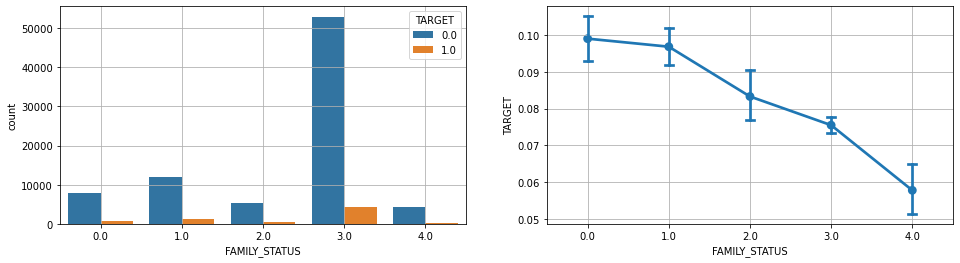

In [40]:
spam = cp.copy()
spam.loc[spam['FAMILY_STATUS']=='Unknown', 'FAMILY_STATUS'] = np.nan
        
spam['FAMILY_STATUS'] = spam['FAMILY_STATUS'].map({'Civil marriage':0, \
                                             'Single / not married':1, \
                                                        'Separated':2, \
                                                          'Married':3, \
                                                            'Widow':4})
categorical_analysis('FAMILY_STATUS', spam)

In [41]:
feature = 'FAMILY_STATUS'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = 'Unknown'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Вдовцы - минимальная вероятность, одинокие и в гражданском браке - повышенная вероятность.'

#### REGION_POPULATION - население региона

nunique = 81
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака REGION_POPULATION в разрезе TARGET


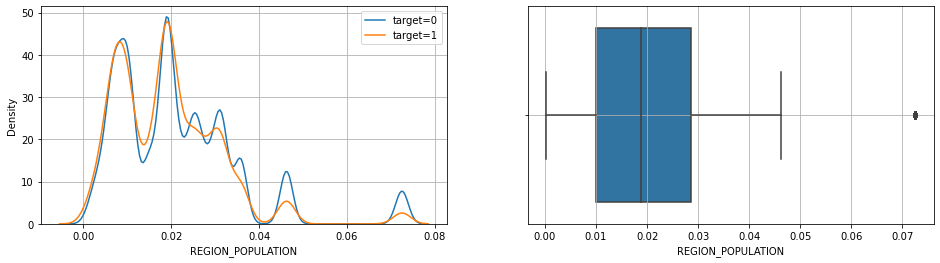

In [42]:
numerical_analysis('REGION_POPULATION', cp)

In [43]:
feature = 'REGION_POPULATION'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Менее населенные регионы - вероятность меньше'

#### AGE - возраст в днях

nunique = 17384
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака AGE в разрезе TARGET


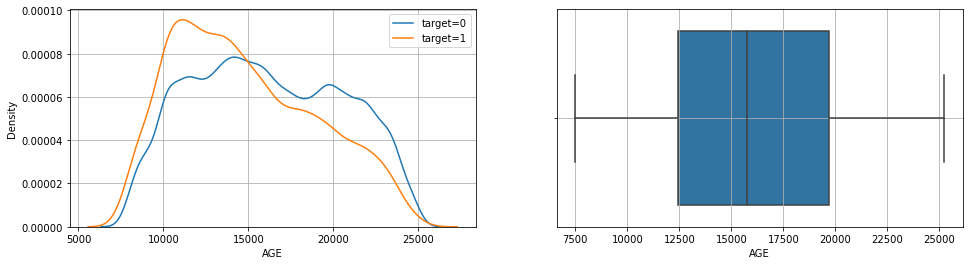

In [44]:
numerical_analysis('AGE', cp)

In [45]:
feature = 'AGE'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Чем меньше возраст, тем больше вероятность. Граница 15000'

#### DAYS_ON_LAST_JOB - дней на последней работе

nunique = 11864
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака DAYS_ON_LAST_JOB в разрезе TARGET


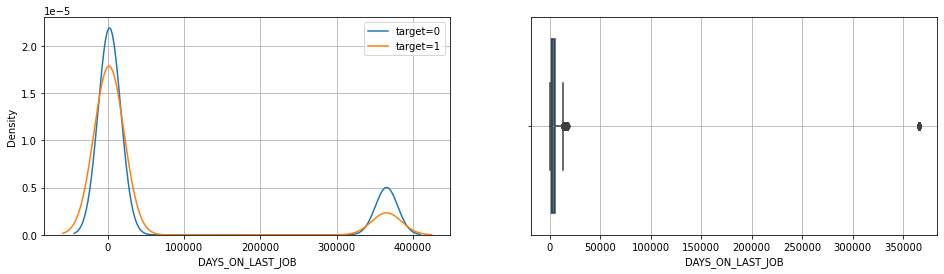

In [46]:
numerical_analysis('DAYS_ON_LAST_JOB', cp)

In [47]:
cp[cp['DAYS_ON_LAST_JOB']>50000]

,APPLICATION_NUMBER,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,NAME_CONTRACT_TYPE
3,123710391,M,0.0,180000.0,518562.0,22972.5,Secondary / secondary special,Married,0.031329,22338.0,365243.0,NaN,0.0,0.0,2.0,NaN,0.171299,0.170446,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cash
15,123572982,M,0.0,121500.0,123993.0,5589.0,Lower secondary,Married,0.007305,22454.0,365243.0,12.0,1.0,0.0,2.0,NaN,0.333605,0.360613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash
18,123724887,F,0.0,202500.0,545040.0,19705.5,Higher education,Married,0.009630,20720.0,365243.0,NaN,0.0,0.0,2.0,0.894689,0.471016,0.420611,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Cash
20,123437928,F,0.0,90000.0,284400.0,16456.5,Secondary / secondary special,Married,0.010966,23855.0,365243.0,NaN,0.0,0.0,2.0,NaN,0.523247,0.151935,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Cash
23,123681539,F,0.0,112500.0,794173.5,40680.0,Secondary / secondary special,Married,0.031329,20825.0,365243.0,10.0,0.0,0.0,2.0,NaN,0.632815,0.320163,0.0,0.0,0.0,0.0,2.0,8.0,0.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275181,123634421,F,0.0,180000.0,180000.0,9000.0,Secondary / secondary special,Married,0.003122,21841.0,365243.0,NaN,0.0,0.0,2.0,0.616007,0.596097,0.707699,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Credit Card
275195,123557419,F,0.0,180000.0,808650.0,26217.0,Higher education,Single / not married,0.018209,21545.0,365243.0,27.0,1.0,0.0,1.0,0.748625,0.512267,0.654529,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Cash
275203,123572344,F,0.0,112500.0,562491.0,22140.0,Higher education,Married,0.001417,22736.0,365243.0,NaN,1.0,0.0,2.0,NaN,0.572776,0.204423,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Cash
275221,123605596,F,0.0,81000.0,276277.5,10368.0,Higher education,Married,0.007020,24184.0,365243.0,3.0,0.0,0.0,2.0,NaN,0.805767,0.622922,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Cash


nunique = 11863
NaN sum = 91629
NaN % = 33.29
***************
Распределение признака DAYS_ON_LAST_JOB в разрезе TARGET


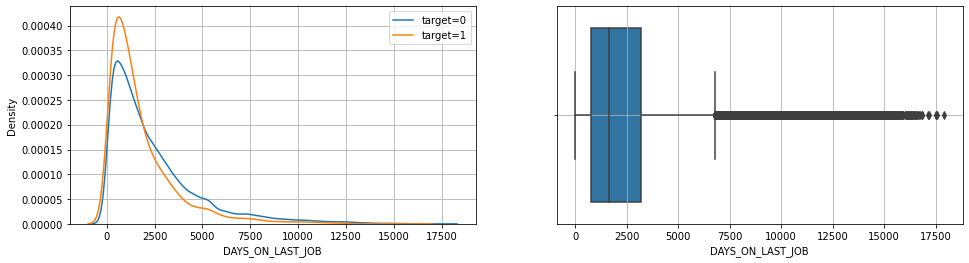

In [48]:
spam = cp.copy()
spam.loc[spam['DAYS_ON_LAST_JOB'] == 365243.0, 'DAYS_ON_LAST_JOB'] = np.nan
numerical_analysis('DAYS_ON_LAST_JOB', data=spam)

In [52]:
feature = 'DAYS_ON_LAST_JOB'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 33.29
anatysis_result_cp.loc[feature, 'Выбросы'] = 365243.0
anatysis_result_cp.loc[feature, 'Вывод'] = 'Меньше 2000 дней работы - больше вероятность'

#### OWN_CAR_AGE - возраст машины в годах

nunique = 58
NaN sum = 199200
NaN % = 72.37
***************
Распределение признака OWN_CAR_AGE в разрезе TARGET


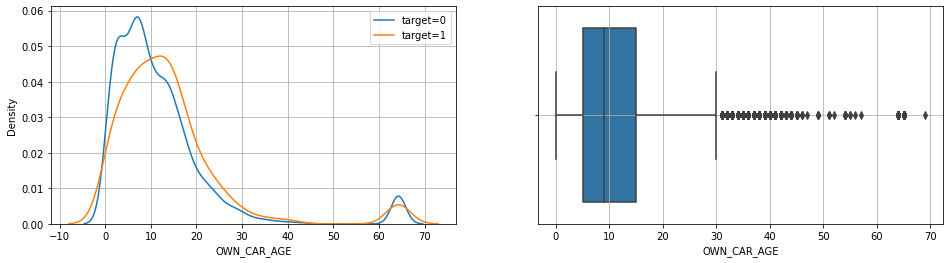

In [49]:
numerical_analysis('OWN_CAR_AGE', cp)

In [50]:
feature = 'OWN_CAR_AGE'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 72.37
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Машина от 10 до 50 лет - больше вероятность'

#### FLAG_PHONE - контактный телефон

nunique = 2
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака FLAG_PHONE в разрезе TARGET


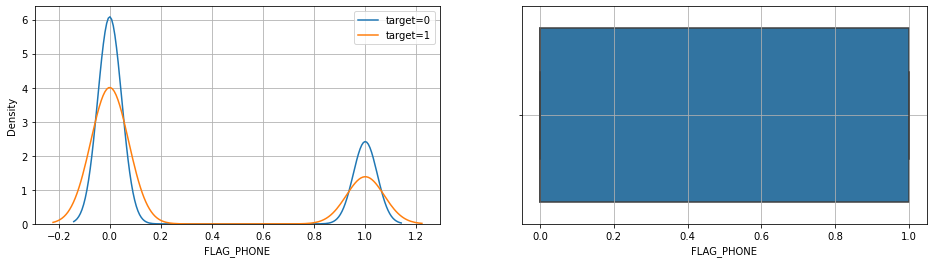

In [51]:
numerical_analysis('FLAG_PHONE', cp)

In [52]:
feature = 'FLAG_PHONE'
anatysis_result_cp.loc[feature, 'Тип'] = 'Бинарный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### FLAG_EMAIL - электронная почта

nunique = 2
NaN sum = 51519
NaN % = 18.72
***************
Распределение признака FLAG_EMAIL в разрезе TARGET


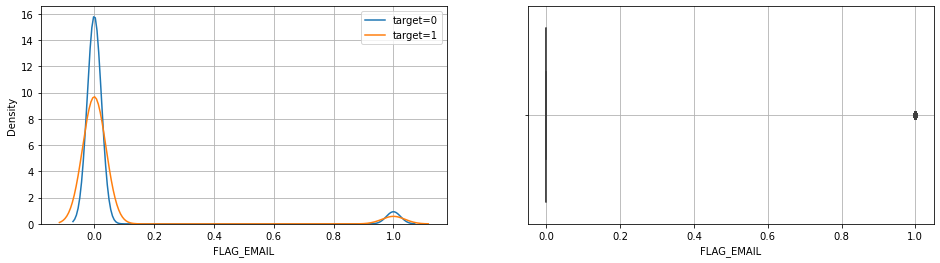

In [53]:
numerical_analysis('FLAG_EMAIL', cp)

In [54]:
feature = 'FLAG_EMAIL'
anatysis_result_cp.loc[feature, 'Тип'] = 'Бинарный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### FAMILY_SIZE - размер семьи

nunique = 16
NaN sum = 51521
NaN % = 18.72
***************
Распределение признака FAMILY_SIZE в разрезе TARGET


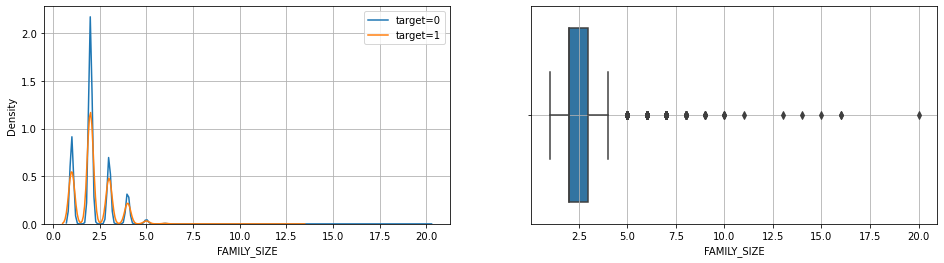

In [55]:
numerical_analysis('FAMILY_SIZE', cp)

In [56]:
feature = 'FAMILY_SIZE'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.72
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### EXTERNAL_SCORING_RATING_1 - внешняя оценка рейтинга 1

nunique = 86992
NaN sum = 177508
NaN % = 64.49
***************
Распределение признака EXTERNAL_SCORING_RATING_1 в разрезе TARGET


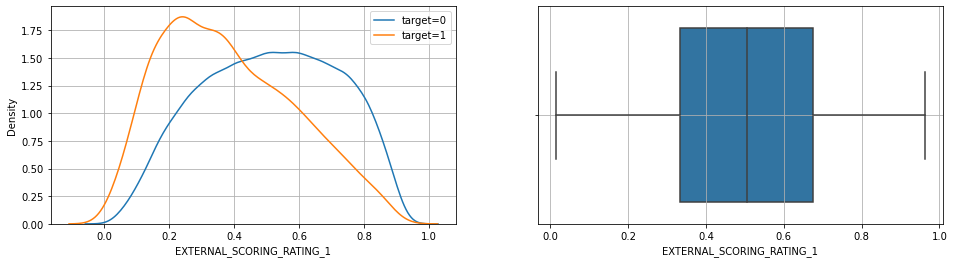

In [57]:
numerical_analysis('EXTERNAL_SCORING_RATING_1', cp)

In [58]:
feature = 'EXTERNAL_SCORING_RATING_1'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 64.49
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Чем меньше оценка, тем больше вероятность. Граница - 0,415'

#### EXTERNAL_SCORING_RATING_2 - внешняя оценка рейтинга 2

nunique = 104429
NaN sum = 51998
NaN % = 18.89
***************
Распределение признака EXTERNAL_SCORING_RATING_2 в разрезе TARGET


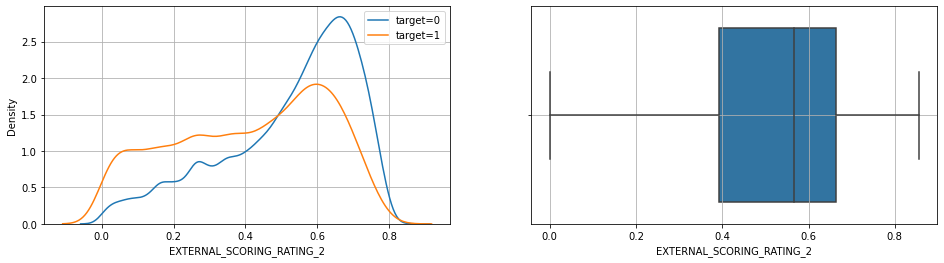

In [59]:
numerical_analysis('EXTERNAL_SCORING_RATING_2', cp)

In [60]:
feature = 'EXTERNAL_SCORING_RATING_2'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 18.89
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Чем меньше оценка, тем больше вероятность. Граница - 0,48'

#### EXTERNAL_SCORING_RATING_3  - внешняя оценка рейтинга 3

nunique = 798
NaN sum = 95926
NaN % = 34.85
***************
Распределение признака EXTERNAL_SCORING_RATING_3 в разрезе TARGET


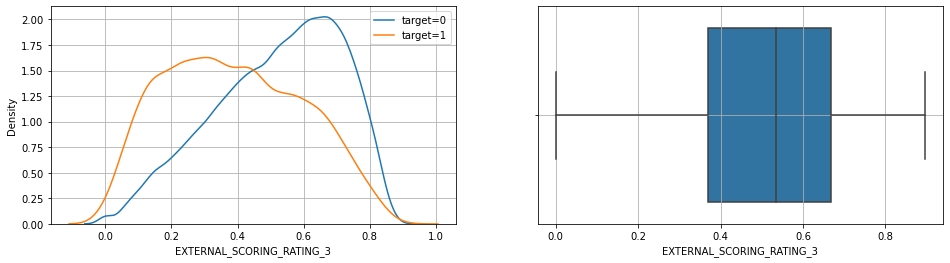

In [350]:
numerical_analysis('EXTERNAL_SCORING_RATING_3', cp)

In [82]:
feature = 'EXTERNAL_SCORING_RATING_3'
anatysis_result_cp.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_cp.loc[feature, 'NAN %'] = 34.85
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Чем меньше оценка, тем больше вероятность. Граница - 0,45'

#### AMT_REQ_CREDIT_BUREAU_HOUR

nunique = 5
NaN sum = 81717
NaN % = 29.69
***************
Распределение признака AMT_REQ_CREDIT_BUREAU_HOUR в разрезе TARGET


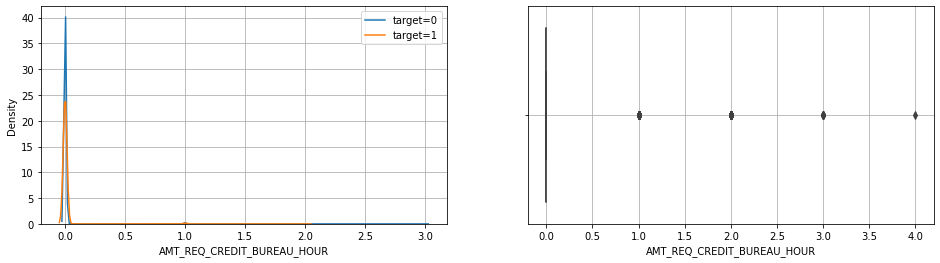

In [68]:
numerical_analysis('AMT_REQ_CREDIT_BUREAU_HOUR', cp)

In [69]:
feature = 'AMT_REQ_CREDIT_BUREAU_HOUR'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 29.69
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMT_REQ_CREDIT_BUREAU_DAY

nunique = 8
NaN sum = 81717
NaN % = 29.69
***************
Распределение признака AMT_REQ_CREDIT_BUREAU_DAY в разрезе TARGET


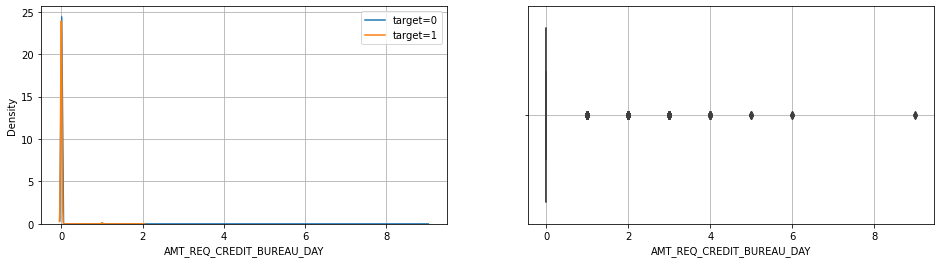

In [70]:
numerical_analysis('AMT_REQ_CREDIT_BUREAU_DAY', cp)

In [71]:
feature = 'AMT_REQ_CREDIT_BUREAU_DAY'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 29.69
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMT_REQ_CREDIT_BUREAU_WEEK

nunique = 9
NaN sum = 81717
NaN % = 29.69
***************
Распределение признака AMT_REQ_CREDIT_BUREAU_WEEK в разрезе TARGET


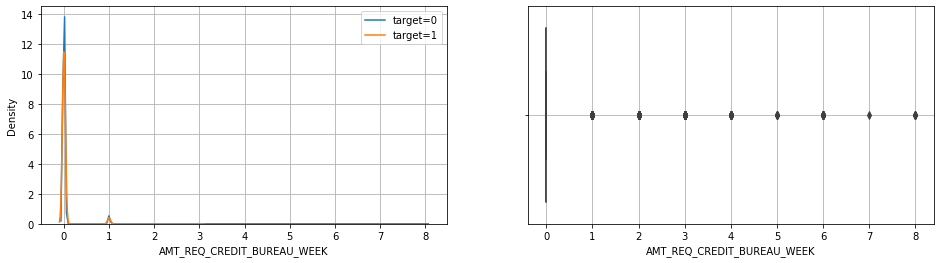

In [72]:
numerical_analysis('AMT_REQ_CREDIT_BUREAU_WEEK', cp)

In [73]:
feature = 'AMT_REQ_CREDIT_BUREAU_WEEK'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 29.69
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMT_REQ_CREDIT_BUREAU_MON

nunique = 24
NaN sum = 81717
NaN % = 29.69
***************
Распределение признака AMT_REQ_CREDIT_BUREAU_MON в разрезе TARGET


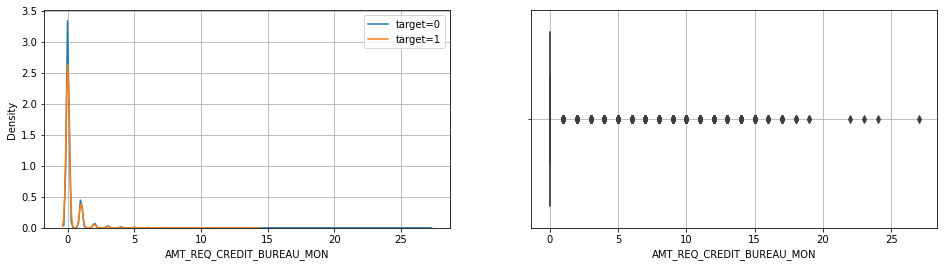

In [74]:
numerical_analysis('AMT_REQ_CREDIT_BUREAU_MON', cp)

In [75]:
feature = 'AMT_REQ_CREDIT_BUREAU_MON'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 29.69
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMT_REQ_CREDIT_BUREAU_QRT

nunique = 11
NaN sum = 81717
NaN % = 29.69
***************
Распределение признака AMT_REQ_CREDIT_BUREAU_QRT в разрезе TARGET


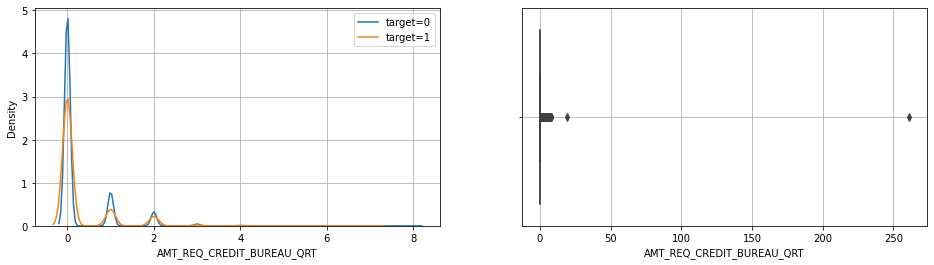

In [76]:
numerical_analysis('AMT_REQ_CREDIT_BUREAU_QRT', cp)

In [77]:
feature = 'AMT_REQ_CREDIT_BUREAU_QRT'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 29.69
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMT_REQ_CREDIT_BUREAU_YEAR

nunique = 24
NaN sum = 81717
NaN % = 29.69
***************
Распределение признака AMT_REQ_CREDIT_BUREAU_YEAR в разрезе TARGET


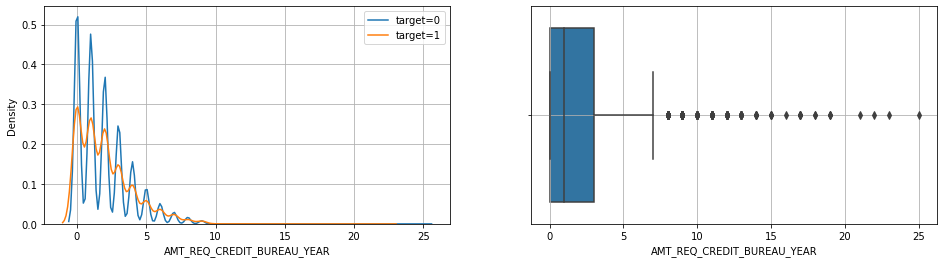

In [78]:
numerical_analysis('AMT_REQ_CREDIT_BUREAU_YEAR', cp)

In [79]:
feature = 'AMT_REQ_CREDIT_BUREAU_YEAR'
anatysis_result_cp.loc[feature, 'Тип'] = 'Дискретный'
anatysis_result_cp.loc[feature, 'NAN %'] = 29.69
anatysis_result_cp.loc[feature, 'Выбросы'] = '-'
anatysis_result_cp.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

In [81]:
anatysis_result_cp

,Тип,NAN %,Выбросы,Вывод
NAME_CONTRACT_TYPE,Номинальный,-,-,"Cash вероятность выше, Credit Card - ниже"
GENDER,Номинальный,18.72,XNA,"M вероятность выше, F - ниже"
CHILDRENS,Дискретный,18.72,>11,Зависимости с таргетом нет
TOTAL_SALARY,Непрерывный,18.72,>2 млн,Больше 2 млн. вероятность только 0
AMOUNT_CREDIT,Непрерывный,18.72,>3 млн,В районе 600 тыс вероятность увеличина.
AMOUNT_ANNUITY,Непрерывный,18.72,>150 тыс,В районе 25 тыс вероятность увеличина.
EDUCATION_LEVEL,Порядковый,18.72,-,"Чем выше образование, тем меньше вероятность"
FAMILY_STATUS,Дискретный,18.72,Unknown,"Вдовцы - минимальная вероятность, одинокие и в гражданском браке - повышенная вероятность."
REGION_POPULATION,Непрерывный,18.72,-,Менее населенные регионы - вероятность меньше
AGE,Непрерывный,18.72,-,"Чем меньше возраст, тем больше вероятность. Граница 15000"


# applications_history

In [335]:
ap = applications_history.merge(data, how='inner', on='APPLICATION_NUMBER')
print(ap.shape)
ap.head(3)

(1290512, 28)


,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NAME_CONTRACT_TYPE_x,AMOUNT_ANNUITY,AMT_APPLICATION,AMOUNT_CREDIT,AMOUNT_PAYMENT,AMOUNT_GOODS_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y
0,50070639,123431468,Cash,25188.615,607500.0,679671.0,NaN,607500.0,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,-1,36.0,low_action,365243.0,134.0,916.0,365243.0,365243.0,1.0,0.0,Cash
1,48804486,123431468,Cash,21709.125,450000.0,512370.0,NaN,450000.0,Approved,515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,6,36.0,low_normal,365243.0,485.0,565.0,155.0,147.0,1.0,0.0,Cash
2,49337077,123431468,NaN,4830.930,47250.0,23688.0,24750.0,47250.0,Approved,619,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,110,6.0,high,365243.0,588.0,438.0,588.0,580.0,0.0,0.0,Cash


In [336]:
ap['PREV_APPLICATION_NUMBER'].nunique()

1290512

In [337]:
ap['TARGET'].notnull().sum(), ap['TARGET'].isnull().sum()

(516115, 774397)

In [338]:
ap[ap['TARGET']==0].shape, ap[ap['TARGET']==1].shape

((474306, 28), (41809, 28))

In [214]:
# mask = ap['NAME_CONTRACT_STATUS'] == 'Approved'
# ap = ap.loc[mask]
# ap = ap[ap['DAYS_DECISION']<730]

In [215]:
ap.shape

(340955, 28)

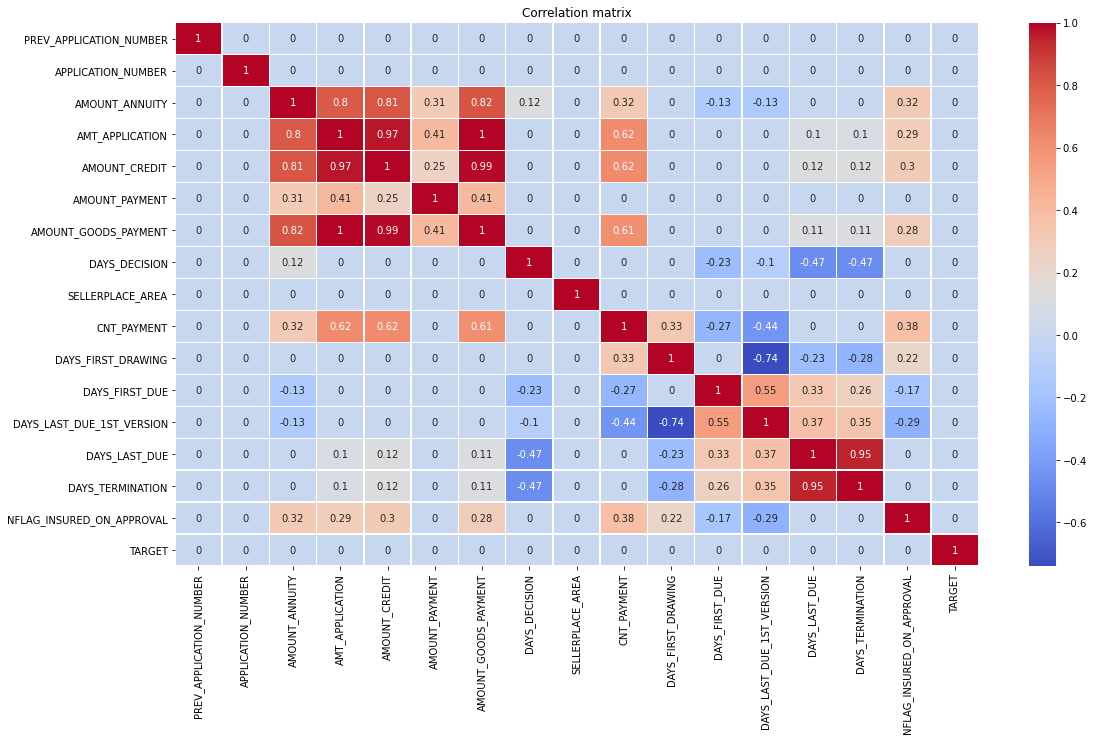

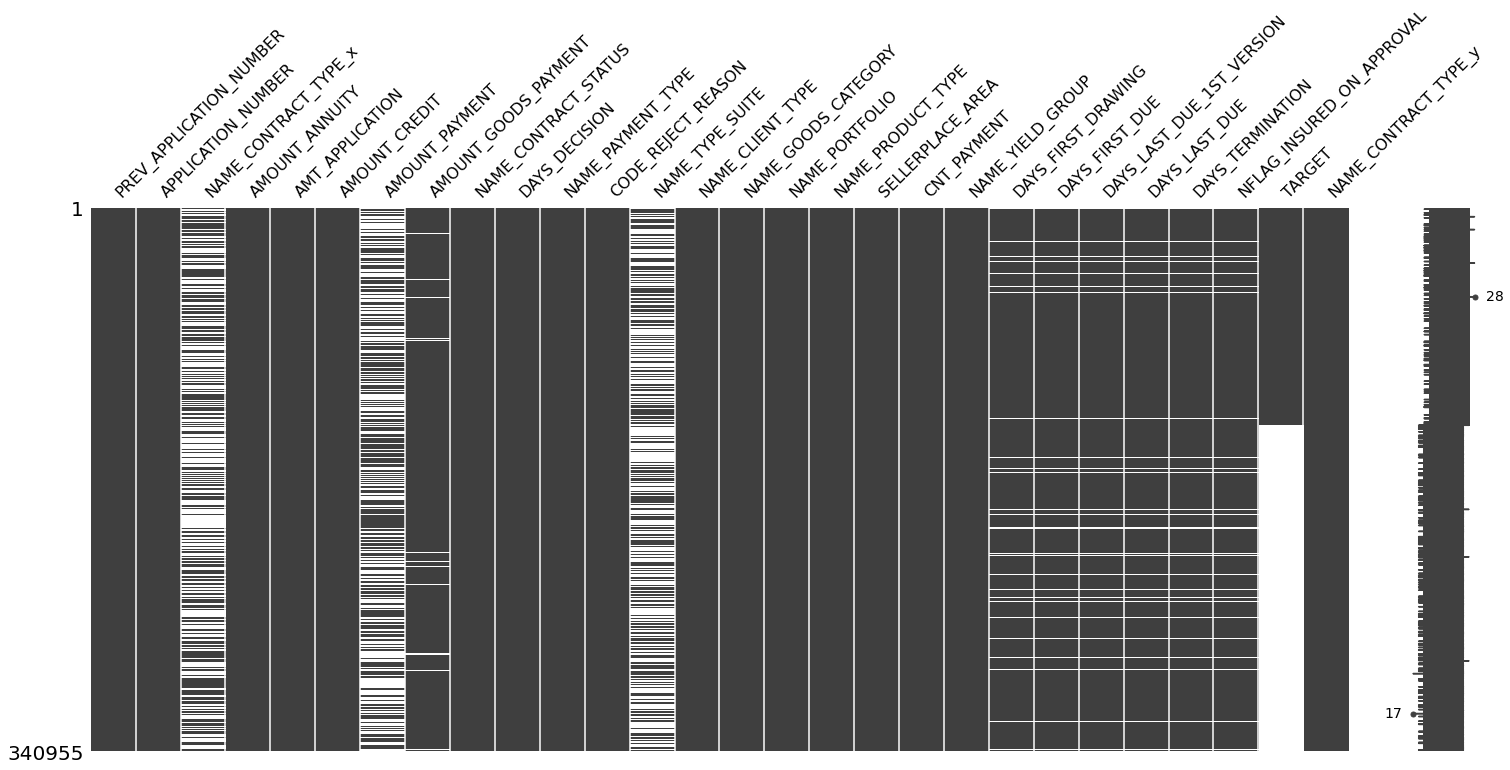

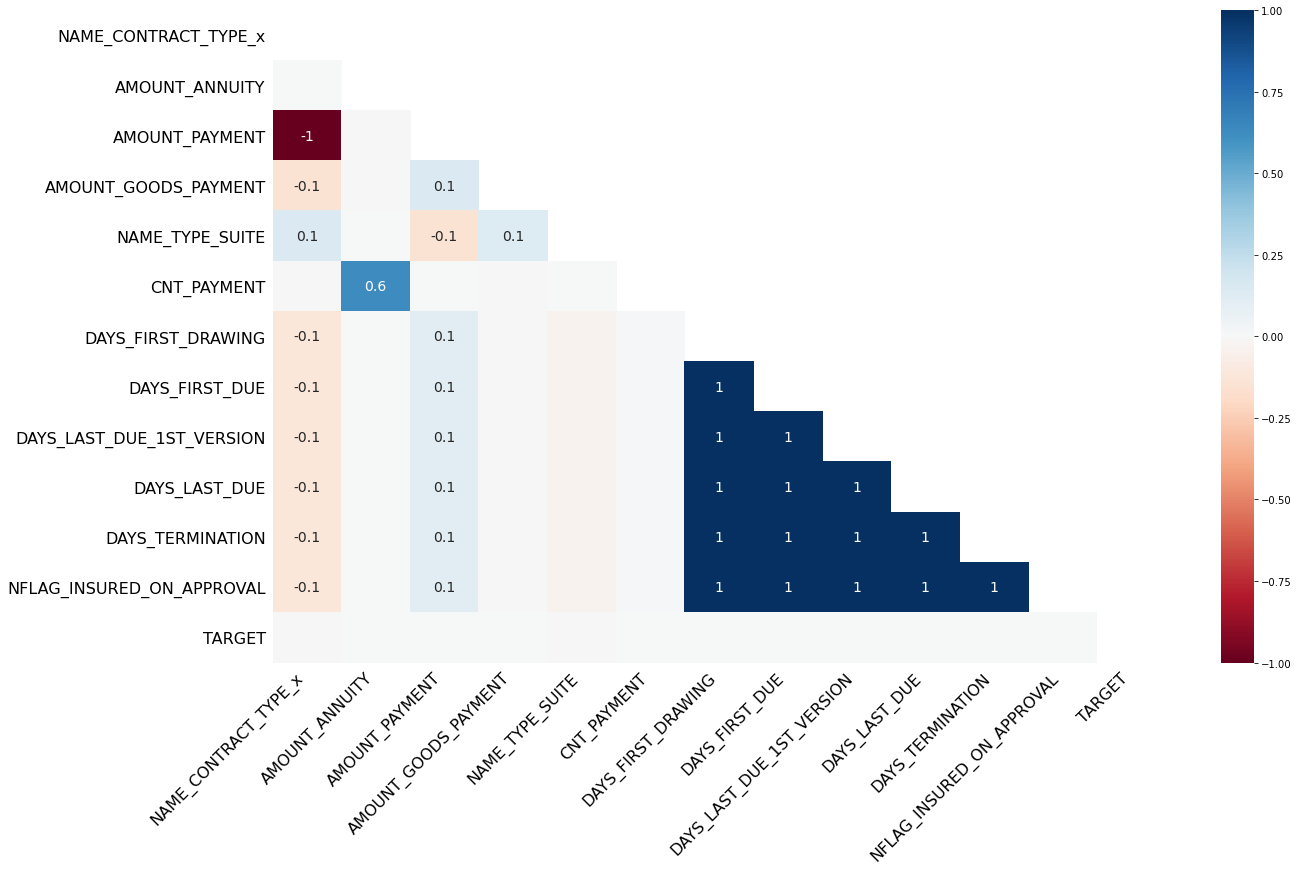

In [216]:
corr_matrix(ap)

In [219]:
anatysis_result_ap = pd.DataFrame(columns=['Тип', 'NAN %', 'Выбросы', 'Вывод'])

#### NAME_CONTRACT_TYPE_x - тип кредита

Cash           577577
Credit Card    149214
Name: NAME_CONTRACT_TYPE_x, dtype: int64
NaN sum = 563721
NaN % = 43.68
***************
Распределение признака NAME_CONTRACT_TYPE_x в разрезе TARGET


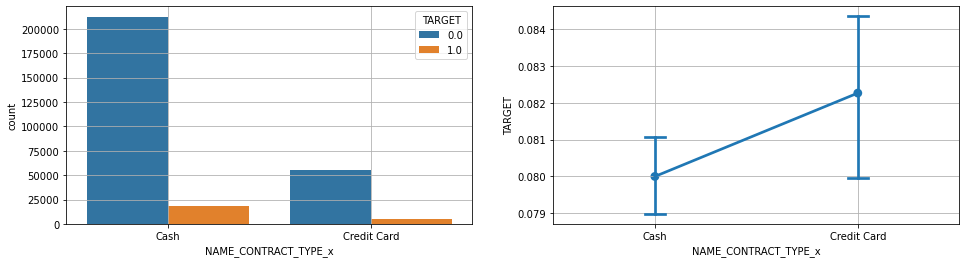

In [339]:
categorical_analysis('NAME_CONTRACT_TYPE_x', ap)

In [221]:
feature = 'NAME_CONTRACT_TYPE_x'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 44.26
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMOUNT_ANNUITY - сумма платежа

nunique = 314943
NaN sum = 287376
NaN % = 22.27
***************
Распределение признака AMOUNT_ANNUITY в разрезе TARGET


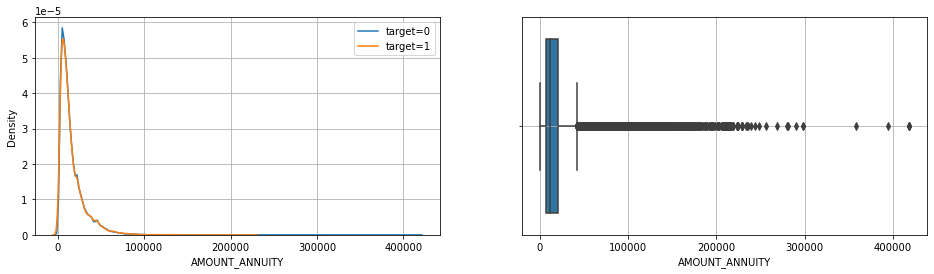

In [340]:
numerical_analysis('AMOUNT_ANNUITY', ap)

In [223]:
feature = 'AMOUNT_ANNUITY'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 23.07
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMT_APPLICATION - сумма запрашиваемая

nunique = 82498
NaN sum = 0
NaN % = 0.0
***************
Распределение признака AMT_APPLICATION в разрезе TARGET


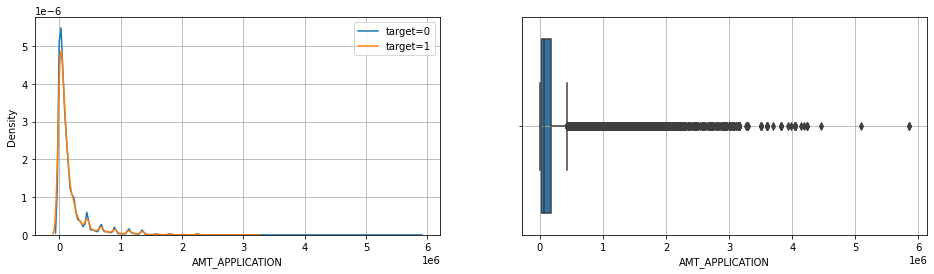

In [341]:
numerical_analysis('AMT_APPLICATION', ap)

In [225]:
feature = 'AMT_APPLICATION'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.03
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMOUNT_CREDIT - сумма кредита

nunique = 79618
NaN sum = 0
NaN % = 0.0
***************
Распределение признака AMOUNT_CREDIT в разрезе TARGET


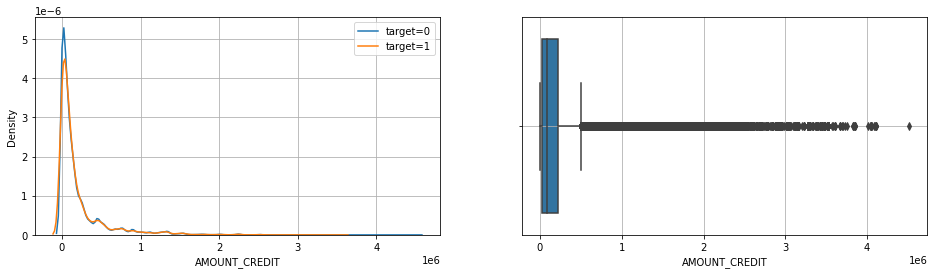

In [342]:
numerical_analysis('AMOUNT_CREDIT', ap)

In [227]:
feature = 'AMOUNT_CREDIT'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.03
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMOUNT_PAYMENT - сумма первоначального взноса

nunique = 12367
NaN sum = 166177
NaN % = 48.74
***************
Распределение признака AMOUNT_PAYMENT в разрезе TARGET


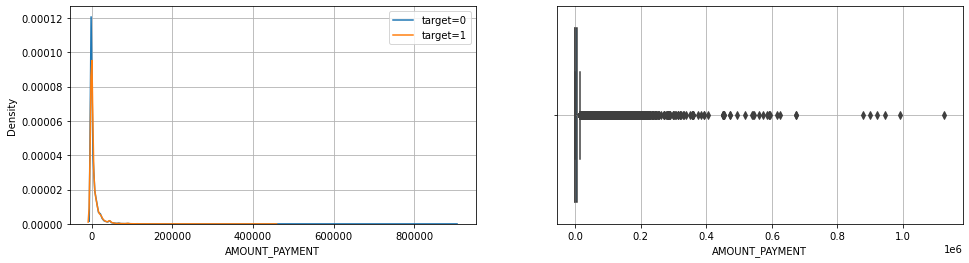

In [228]:
numerical_analysis('AMOUNT_PAYMENT', ap)

In [229]:
feature = 'AMOUNT_PAYMENT'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 54.11
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### AMOUNT_GOODS_PAYMENT - сумма покупки

nunique = 49364
NaN sum = 6692
NaN % = 1.96
***************
Распределение признака AMOUNT_GOODS_PAYMENT в разрезе TARGET


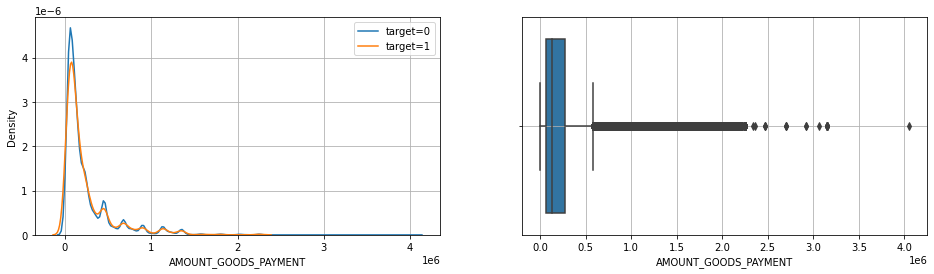

In [230]:
numerical_analysis('AMOUNT_GOODS_PAYMENT', ap)

In [231]:
feature = 'AMOUNT_GOODS_PAYMENT'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 23.86
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### NAME_CONTRACT_STATUS -  статус кредита
- Approved - одобренный
- Canceled - погашенный
- Refused - отказ
- Unused offer - не использованный

Approved    340955
Name: NAME_CONTRACT_STATUS, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака NAME_CONTRACT_STATUS в разрезе TARGET


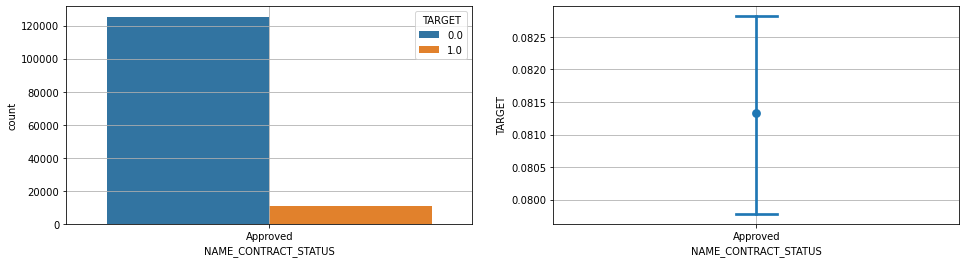

In [232]:
categorical_analysis('NAME_CONTRACT_STATUS', ap)

In [233]:
feature = 'NAME_CONTRACT_STATUS'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.03
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### DAYS_DECISION - дата принятия решения

nunique = 729
NaN sum = 0
NaN % = 0.0
***************
Распределение признака DAYS_DECISION в разрезе TARGET


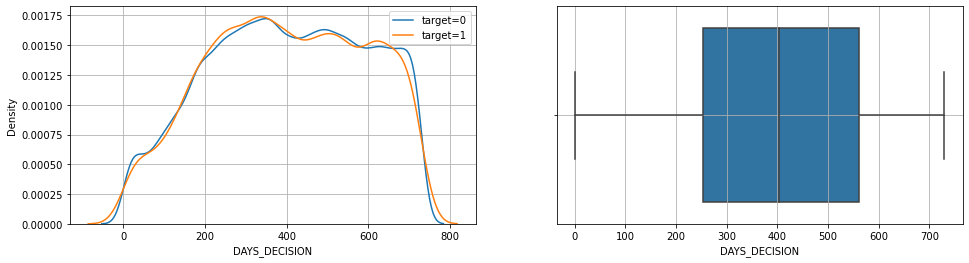

In [234]:
numerical_analysis('DAYS_DECISION', ap)

In [235]:
feature = 'DAYS_DECISION'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.03
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### NAME_PAYMENT_TYPE - тип платежа
- Cash through the bank - наличными в банке
- Non-cash from your account - безналичными в личном кабинете
- Cashless from the account of the employer - безналичными со счета работадателя
- XNA - не известно

Cash through the bank                        258525
XNA                                           80779
Non-cash from your account                     1461
Cashless from the account of the employer       190
Name: NAME_PAYMENT_TYPE, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака NAME_PAYMENT_TYPE в разрезе TARGET


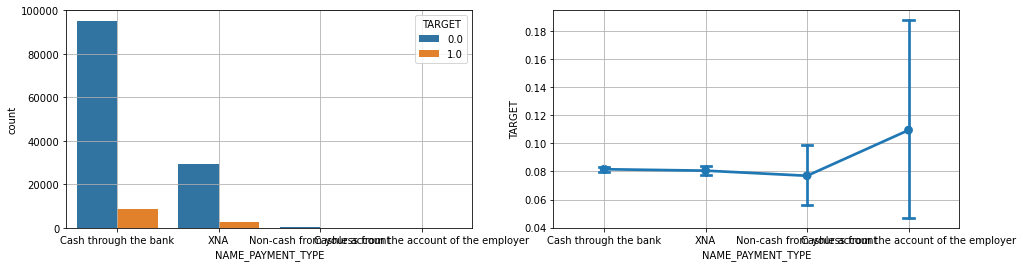

In [236]:
categorical_analysis('NAME_PAYMENT_TYPE', ap)

Cash through the bank                        258525
Non-cash from your account                     1461
Cashless from the account of the employer       190
Name: NAME_PAYMENT_TYPE, dtype: int64
NaN sum = 80779
NaN % = 23.69
***************
Распределение признака NAME_PAYMENT_TYPE в разрезе TARGET


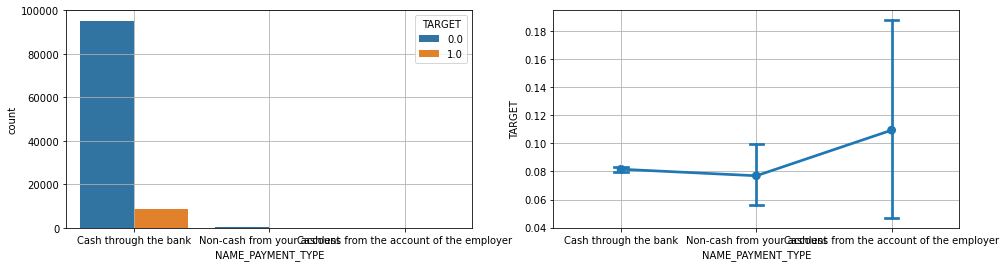

In [237]:
spam = ap.copy()
spam.loc[spam['NAME_PAYMENT_TYPE']=='XNA', 'NAME_PAYMENT_TYPE'] = np.nan
categorical_analysis('NAME_PAYMENT_TYPE', spam)

In [238]:
feature = 'NAME_PAYMENT_TYPE'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 38.19
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### CODE_REJECT_REASON - причина отказа

XAP    340949
XNA         6
Name: CODE_REJECT_REASON, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака CODE_REJECT_REASON в разрезе TARGET


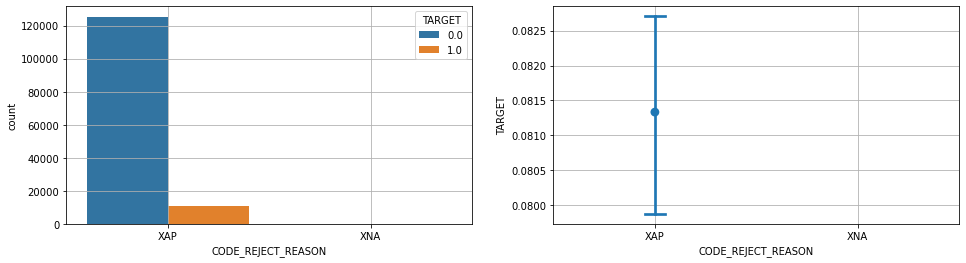

In [239]:
categorical_analysis('CODE_REJECT_REASON', ap)

XAP    340949
Name: CODE_REJECT_REASON, dtype: int64
NaN sum = 6
NaN % = 0.0
***************
Распределение признака CODE_REJECT_REASON в разрезе TARGET


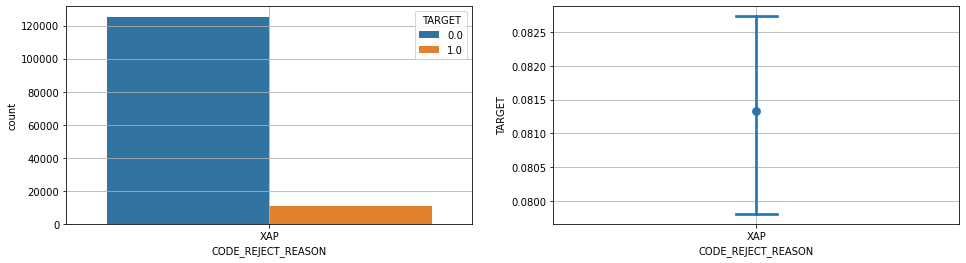

In [240]:
spam = ap.copy()
spam.loc[spam['CODE_REJECT_REASON']=='XNA', 'CODE_REJECT_REASON'] = np.nan
categorical_analysis('CODE_REJECT_REASON', spam)

In [241]:
feature = 'CODE_REJECT_REASON'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.34
anatysis_result_ap.loc[feature, 'Выбросы'] = 'XNA'
anatysis_result_ap.loc[feature, 'Вывод'] = 'SYSTEM - вероятность меньше, VERIF - больше'

#### NAME_TYPE_SUITE - тип сопровождения

Unaccompanied      110998
Family              36340
Spouse, partner      9598
Children             3027
Other_B              2169
Other_A              1067
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
NaN sum = 177485
NaN % = 52.06
***************
Распределение признака NAME_TYPE_SUITE в разрезе TARGET


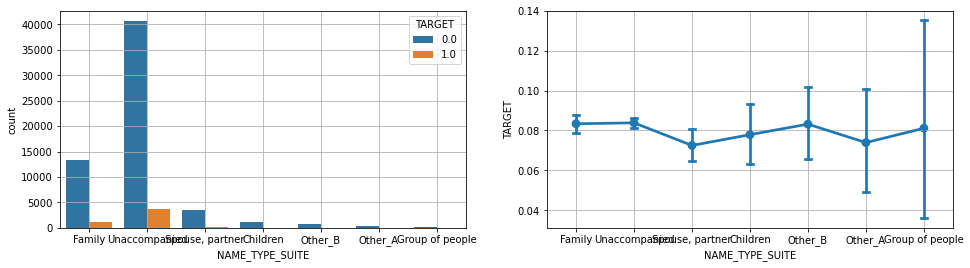

In [242]:
categorical_analysis('NAME_TYPE_SUITE', ap)

In [243]:
feature = 'NAME_TYPE_SUITE'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 49.66
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### NAME_CLIENT_TYPE - тип клиента

Repeater     235643
New           63968
Refreshed     40890
XNA             454
Name: NAME_CLIENT_TYPE, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака NAME_CLIENT_TYPE в разрезе TARGET


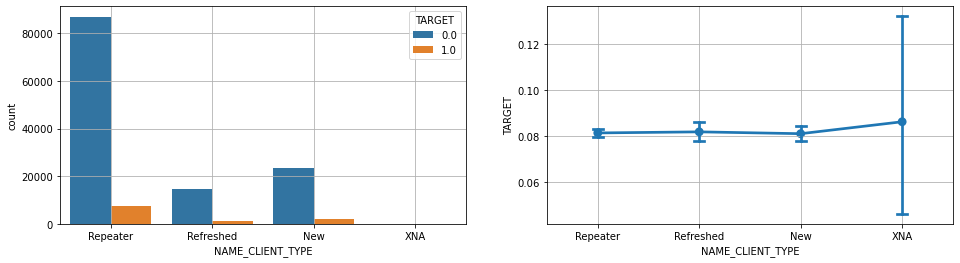

In [244]:
categorical_analysis('NAME_CLIENT_TYPE', ap)

Repeater     235643
New           63968
Refreshed     40890
Name: NAME_CLIENT_TYPE, dtype: int64
NaN sum = 454
NaN % = 0.13
***************
Распределение признака NAME_CLIENT_TYPE в разрезе TARGET


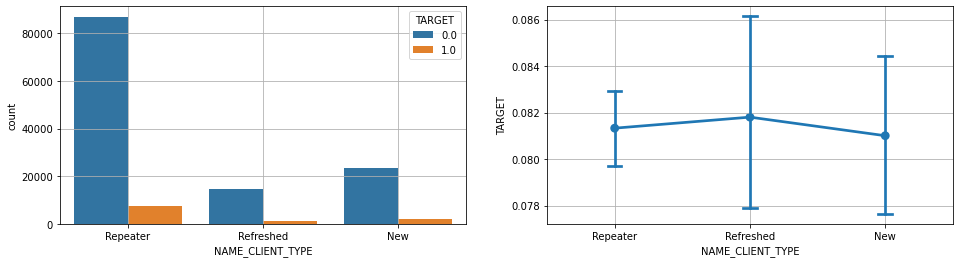

In [245]:
spam = ap.copy()
spam.loc[spam['NAME_CLIENT_TYPE']=='XNA', 'NAME_CLIENT_TYPE'] = np.nan
categorical_analysis('NAME_CLIENT_TYPE', spam)

In [246]:
feature = 'NAME_CLIENT_TYPE'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.15
anatysis_result_ap.loc[feature, 'Выбросы'] = 'XNA'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Refreshed - вероятность больше, Repeater - меньше'

#### NAME_GOODS_CATEGORY - категория товара

XNA                         166889
Mobile                       40688
Consumer Electronics         28426
Computers                    27935
Audio/Video                  22516
Furniture                    16797
Clothing and Accessories      9133
Construction Materials        8470
Jewelry                       3669
Photo / Cinema Equipment      3581
Auto Accessories              3151
Homewares                     2138
Medical Supplies              1672
Vehicles                      1287
Sport and Leisure             1021
Gardening                      908
Tourism                        880
Medicine                       712
Office Appliances              529
Direct Sales                   293
Fitness                        141
Education                       49
Weapon                          28
Insurance                       21
Additional Service              19
Animals                          1
Other                            1
Name: NAME_GOODS_CATEGORY, dtype: int64
NaN sum = 0
NaN

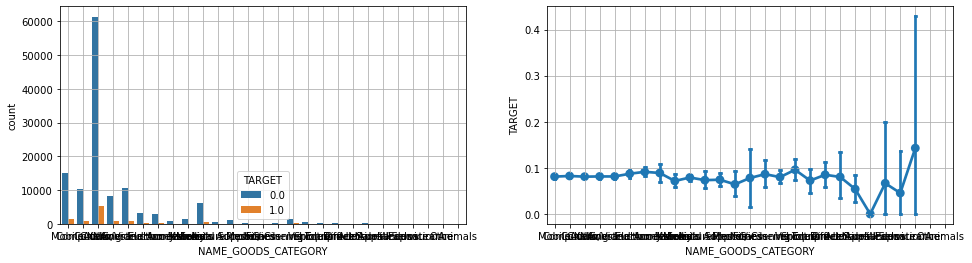

In [247]:
categorical_analysis('NAME_GOODS_CATEGORY', ap)

Mobile                      40688
Consumer Electronics        28426
Computers                   27935
Audio/Video                 22516
Furniture                   16797
Clothing and Accessories     9133
Construction Materials       8470
Jewelry                      3669
Photo / Cinema Equipment     3581
Auto Accessories             3151
Homewares                    2138
Medical Supplies             1672
Vehicles                     1287
Sport and Leisure            1021
Gardening                     908
Tourism                       880
Medicine                      712
Office Appliances             529
Direct Sales                  293
Fitness                       141
Education                      49
Weapon                         28
Insurance                      21
Additional Service             19
Animals                         1
Other                           1
Name: NAME_GOODS_CATEGORY, dtype: int64
NaN sum = 166889
NaN % = 48.95
***************
Распределение признака NAME_G

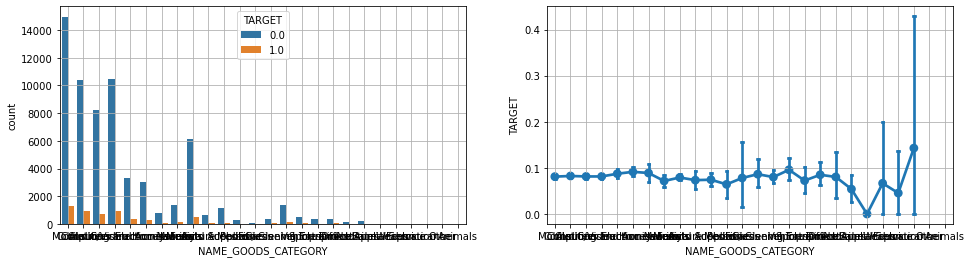

In [248]:
spam = ap.copy()
spam.loc[spam['NAME_GOODS_CATEGORY']=='XNA', 'NAME_GOODS_CATEGORY'] = np.nan
categorical_analysis('NAME_GOODS_CATEGORY', spam)

In [249]:
feature = 'NAME_GOODS_CATEGORY'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 57.37
anatysis_result_ap.loc[feature, 'Выбросы'] = 'XNA'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимость есть'

#### NAME_PORTFOLIO

POS      174126
Cash     121022
Cards     45804
XNA           2
Cars          1
Name: NAME_PORTFOLIO, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака NAME_PORTFOLIO в разрезе TARGET


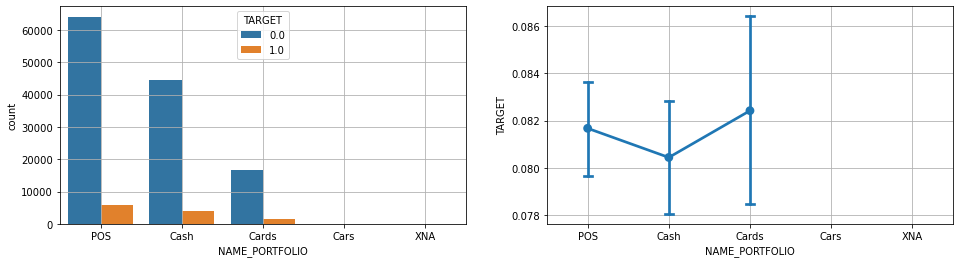

In [250]:
categorical_analysis('NAME_PORTFOLIO', ap)

POS      174126
Cash     121022
Cards     45805
Name: NAME_PORTFOLIO, dtype: int64
NaN sum = 2
NaN % = 0.0
***************
Распределение признака NAME_PORTFOLIO в разрезе TARGET


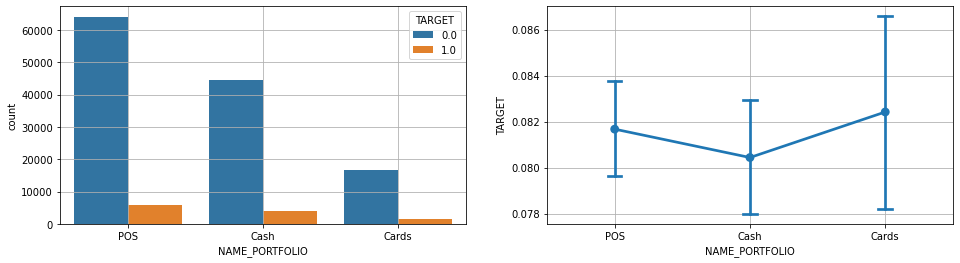

In [251]:
spam = ap.copy()
spam.loc[spam['NAME_PORTFOLIO']=='XNA', 'NAME_PORTFOLIO'] = np.nan
spam.loc[spam['NAME_PORTFOLIO']=='Cars', 'NAME_PORTFOLIO'] = 'Cards'
categorical_analysis('NAME_PORTFOLIO', spam)

In [252]:
feature = 'NAME_PORTFOLIO'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 23.07
anatysis_result_ap.loc[feature, 'Выбросы'] = 'XNA, Cars'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Cash - вероятность меньше'

#### NAME_PRODUCT_TYPE - тип продукта

XNA        174129
x-sell     133560
walk-in     33266
Name: NAME_PRODUCT_TYPE, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака NAME_PRODUCT_TYPE в разрезе TARGET


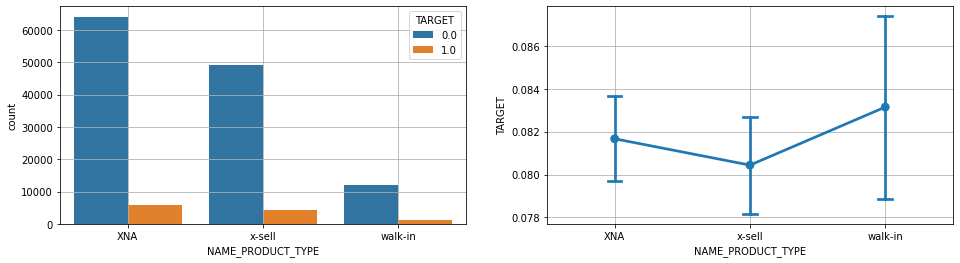

In [253]:
categorical_analysis('NAME_PRODUCT_TYPE', ap)

x-sell     133560
walk-in     33266
Name: NAME_PRODUCT_TYPE, dtype: int64
NaN sum = 174129
NaN % = 51.07
***************
Распределение признака NAME_PRODUCT_TYPE в разрезе TARGET


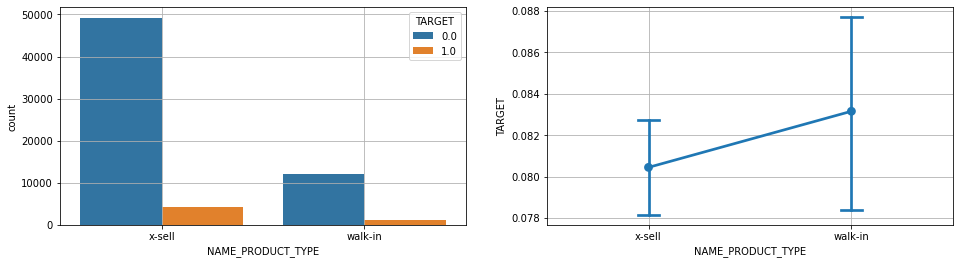

In [254]:
spam = ap.copy()
spam.loc[spam['NAME_PRODUCT_TYPE']=='XNA', 'NAME_PRODUCT_TYPE'] = np.nan
categorical_analysis('NAME_PRODUCT_TYPE', spam)

In [255]:
feature = 'NAME_PRODUCT_TYPE'
anatysis_result_ap.loc[feature, 'Тип'] = 'Номинальный'
anatysis_result_ap.loc[feature, 'NAN %'] = 64.05
anatysis_result_ap.loc[feature, 'Выбросы'] = 'XNA'
anatysis_result_ap.loc[feature, 'Вывод'] = 'walk-in - больше, x-sell - меньше'

#### SELLERPLACE_AREA

nunique = 1248
NaN sum = 0
NaN % = 0.0
***************
Распределение признака SELLERPLACE_AREA в разрезе TARGET


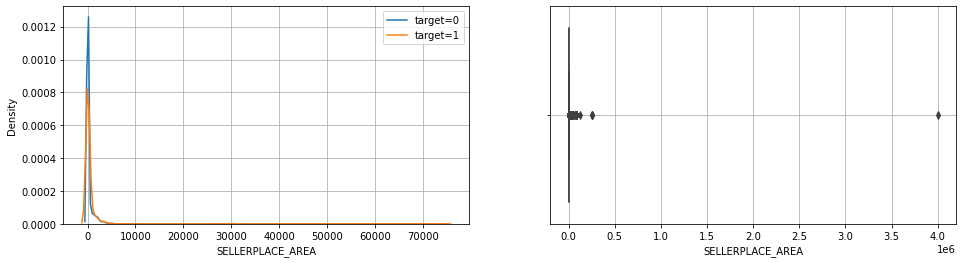

In [256]:
numerical_analysis('SELLERPLACE_AREA', ap)

In [257]:
feature = 'SELLERPLACE_AREA'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.03
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### CNT_PAYMENT

nunique = 37
NaN sum = 2
NaN % = 0.0
***************
Распределение признака CNT_PAYMENT в разрезе TARGET


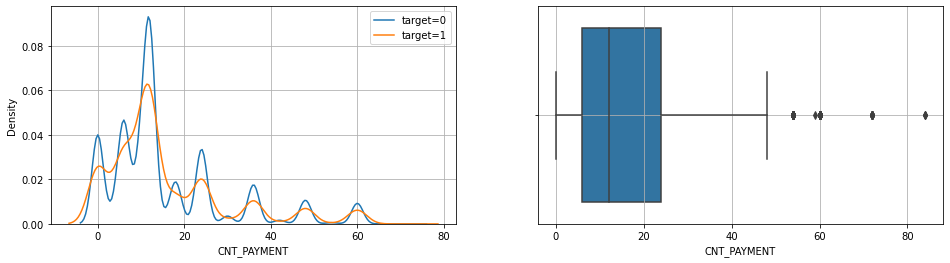

In [258]:
numerical_analysis('CNT_PAYMENT', ap)

In [259]:
feature = 'CNT_PAYMENT'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 1.03
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### NAME_YIELD_GROUP - группа доходности
- middle - средний
- low_normal - 
- high - высокий
- low_action - 

middle        120942
low_normal     94517
high           50904
XNA            45806
low_action     28786
Name: NAME_YIELD_GROUP, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака NAME_YIELD_GROUP в разрезе TARGET


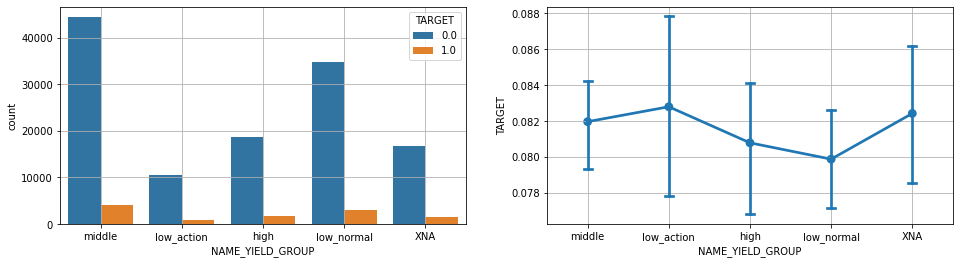

In [260]:
categorical_analysis('NAME_YIELD_GROUP', ap)

middle        120942
low_normal     94517
high           50904
low_action     28786
Name: NAME_YIELD_GROUP, dtype: int64
NaN sum = 45806
NaN % = 13.43
***************
Распределение признака NAME_YIELD_GROUP в разрезе TARGET


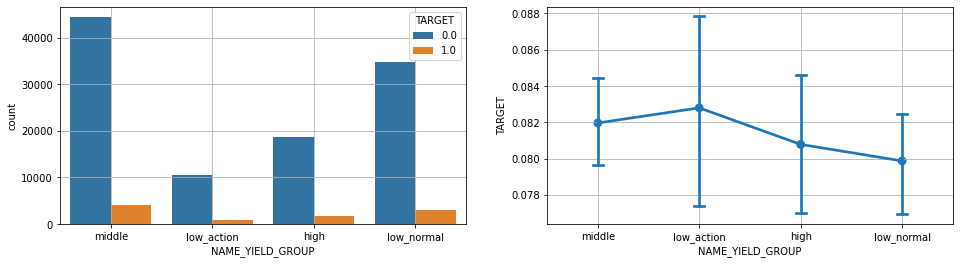

In [261]:
spam = ap.copy()
spam.loc[spam['NAME_YIELD_GROUP']=='XNA', 'NAME_YIELD_GROUP'] = np.nan
categorical_analysis('NAME_YIELD_GROUP', spam)

In [262]:
feature = 'NAME_YIELD_GROUP'
anatysis_result_ap.loc[feature, 'Тип'] = 'Порядковый'
anatysis_result_ap.loc[feature, 'NAN %'] = 31,66
anatysis_result_ap.loc[feature, 'Выбросы'] = 'XNA'
anatysis_result_ap.loc[feature, 'Вывод'] = 'low_action - вероятность выше'

#### DAYS_FIRST_DRAWING

nunique = 731
NaN sum = 19135
NaN % = 5.61
***************
Распределение признака DAYS_FIRST_DRAWING в разрезе TARGET


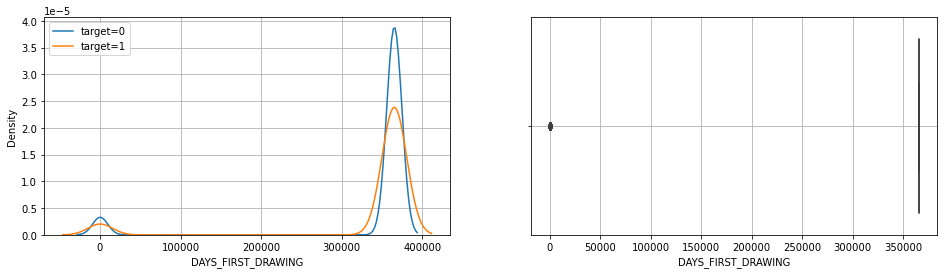

In [263]:
numerical_analysis('DAYS_FIRST_DRAWING', ap)

nunique = 730
NaN sum = 315667
NaN % = 92.58
***************
Распределение признака DAYS_FIRST_DRAWING в разрезе TARGET


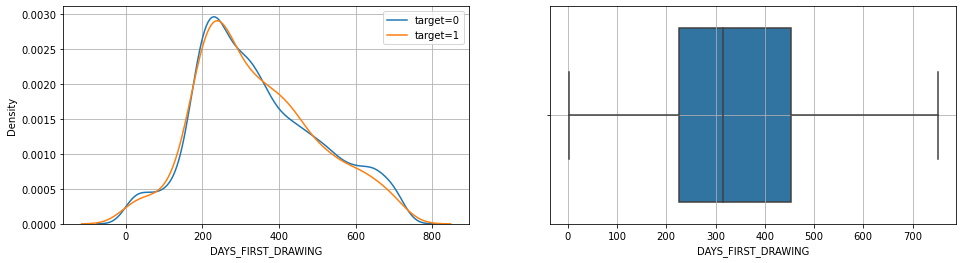

In [264]:
spam = ap.copy()
spam.loc[spam['DAYS_FIRST_DRAWING'] == 365243.0, 'DAYS_FIRST_DRAWING'] = np.nan
numerical_analysis('DAYS_FIRST_DRAWING', spam)

In [265]:
feature = 'DAYS_FIRST_DRAWING'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 96.29
anatysis_result_ap.loc[feature, 'Выбросы'] = 365243.0
anatysis_result_ap.loc[feature, 'Вывод'] = 'от 100 до 500 дней вероятность 0'

#### DAYS_FIRST_DUE

nunique = 702
NaN sum = 19135
NaN % = 5.61
***************
Распределение признака DAYS_FIRST_DUE в разрезе TARGET


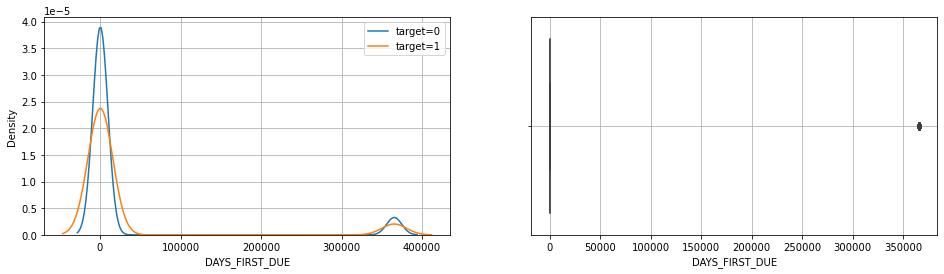

In [266]:
numerical_analysis('DAYS_FIRST_DUE', ap)

nunique = 701
NaN sum = 44177
NaN % = 12.96
***************
Распределение признака DAYS_FIRST_DUE в разрезе TARGET


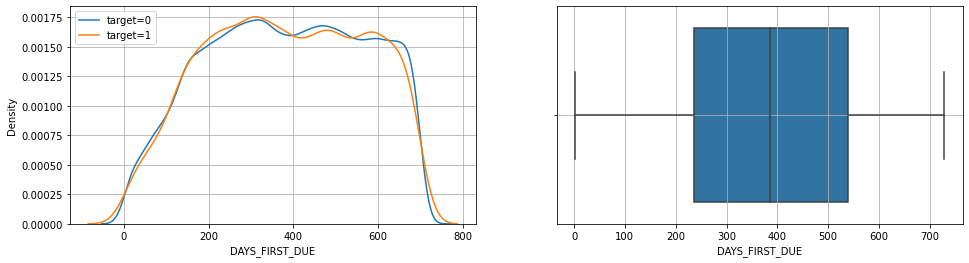

In [267]:
spam = ap.copy()
spam.loc[spam['DAYS_FIRST_DUE'] == 365243.0, 'DAYS_FIRST_DUE'] = np.nan
numerical_analysis('DAYS_FIRST_DUE', spam)

In [268]:
feature = 'DAYS_FIRST_DUE'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 43.32
anatysis_result_ap.loc[feature, 'Выбросы'] = 365243.0
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

#### DAYS_LAST_DUE_1ST_VERSION

nunique = 1794
NaN sum = 19135
NaN % = 5.61
***************
Распределение признака DAYS_LAST_DUE_1ST_VERSION в разрезе TARGET


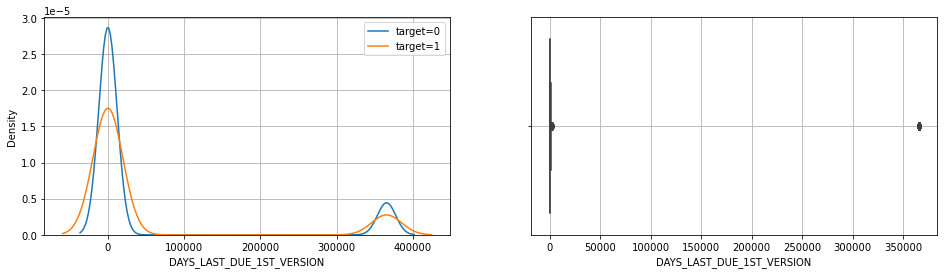

In [269]:
numerical_analysis('DAYS_LAST_DUE_1ST_VERSION', ap)

nunique = 1793
NaN sum = 62345
NaN % = 18.29
***************
Распределение признака DAYS_LAST_DUE_1ST_VERSION в разрезе TARGET


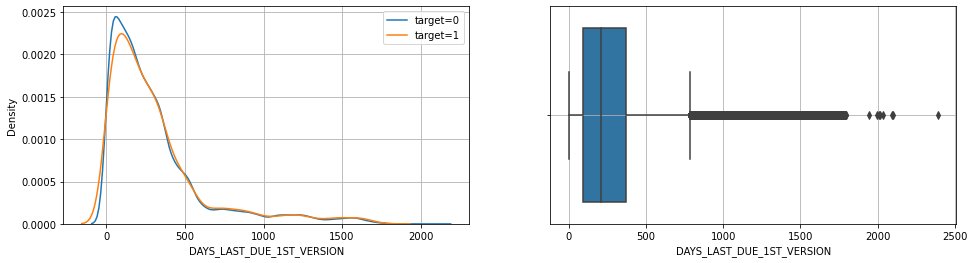

In [270]:
spam = ap.copy()
spam.loc[spam['DAYS_LAST_DUE_1ST_VERSION'] == 365243.0, 'DAYS_LAST_DUE_1ST_VERSION'] = np.nan
numerical_analysis('DAYS_LAST_DUE_1ST_VERSION', spam)

In [271]:
feature = 'DAYS_LAST_DUE_1ST_VERSION'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 46.47
anatysis_result_ap.loc[feature, 'Выбросы'] = 365243.0
anatysis_result_ap.loc[feature, 'Вывод'] = 'до 200 вероятность 0'

#### DAYS_LAST_DUE

nunique = 702
NaN sum = 19135
NaN % = 5.61
***************
Распределение признака DAYS_LAST_DUE в разрезе TARGET


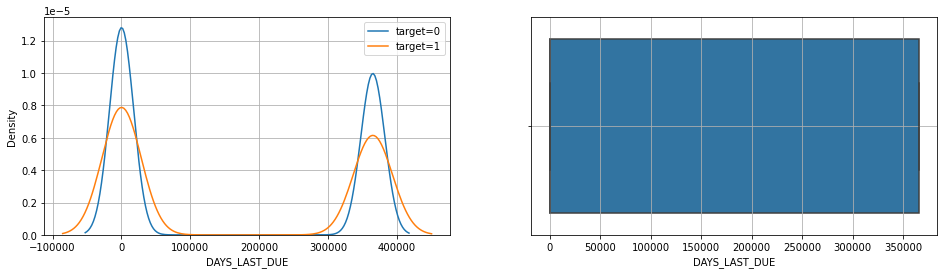

In [272]:
numerical_analysis('DAYS_LAST_DUE', ap)

nunique = 701
NaN sum = 159597
NaN % = 46.81
***************
Распределение признака DAYS_LAST_DUE в разрезе TARGET


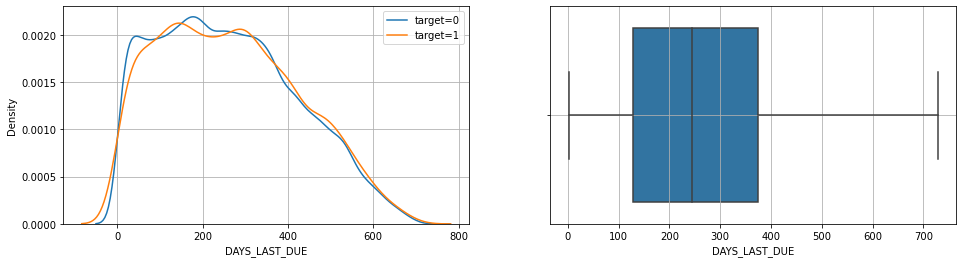

In [273]:
spam = ap.copy()
spam.loc[spam['DAYS_LAST_DUE'] == 365243.0, 'DAYS_LAST_DUE'] = np.nan
numerical_analysis('DAYS_LAST_DUE', spam)

In [143]:
feature = 'DAYS_LAST_DUE'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 53.43
anatysis_result_ap.loc[feature, 'Выбросы'] = 365243.0
anatysis_result_ap.loc[feature, 'Вывод'] = 'до 350 дней вероятность 0'

#### DAYS_TERMINATION

nunique = 699
NaN sum = 19135
NaN % = 5.61
***************
Распределение признака DAYS_TERMINATION в разрезе TARGET


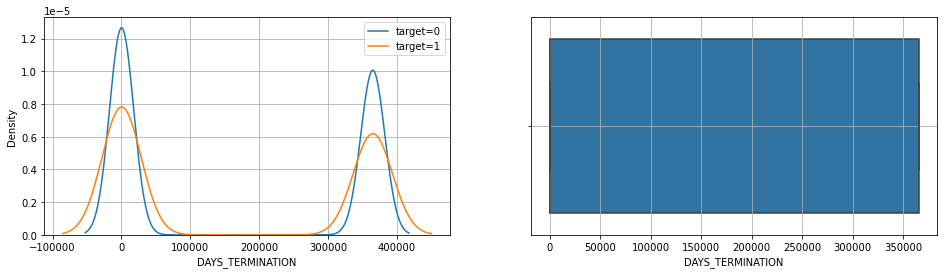

In [274]:
numerical_analysis('DAYS_TERMINATION', ap)

nunique = 698
NaN sum = 161394
NaN % = 47.34
***************
Распределение признака DAYS_TERMINATION в разрезе TARGET


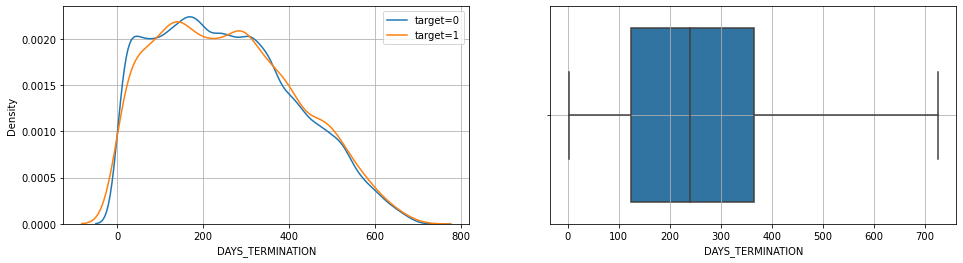

In [275]:
spam = ap.copy()
spam.loc[spam['DAYS_TERMINATION'] == 365243.0, 'DAYS_TERMINATION'] = np.nan
numerical_analysis('DAYS_TERMINATION', spam)

In [146]:
feature = 'DAYS_TERMINATION'
anatysis_result_ap.loc[feature, 'Тип'] = 'Непрерывный'
anatysis_result_ap.loc[feature, 'NAN %'] = 54.3
anatysis_result_ap.loc[feature, 'Выбросы'] = 365243.0
anatysis_result_ap.loc[feature, 'Вывод'] = 'до 350 дней вероятность 0'

#### NFLAG_INSURED_ON_APPROVAL

nunique = 2
NaN sum = 19135
NaN % = 5.61
***************
Распределение признака NFLAG_INSURED_ON_APPROVAL в разрезе TARGET


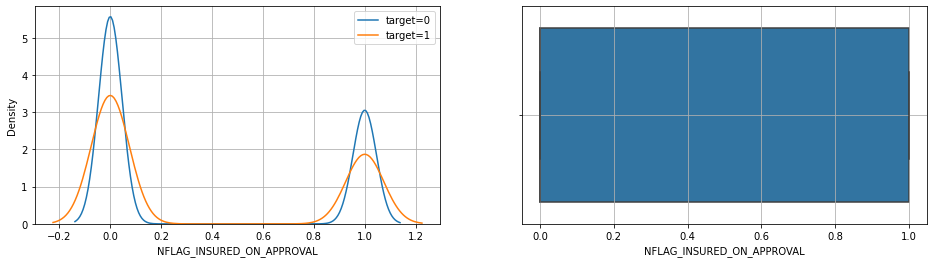

In [276]:
numerical_analysis('NFLAG_INSURED_ON_APPROVAL', ap)

In [148]:
feature = 'NFLAG_INSURED_ON_APPROVAL'
anatysis_result_ap.loc[feature, 'Тип'] = 'Бинарный'
anatysis_result_ap.loc[feature, 'NAN %'] = 40.91
anatysis_result_ap.loc[feature, 'Выбросы'] = '-'
anatysis_result_ap.loc[feature, 'Вывод'] = 'Зависимости с таргетом нет'

In [277]:
anatysis_result_ap

,Тип,NAN %,Выбросы,Вывод
NAME_CONTRACT_TYPE_x,Номинальный,44.26,-,Зависимости с таргетом нет
AMOUNT_ANNUITY,Непрерывный,23.07,-,Зависимости с таргетом нет
AMT_APPLICATION,Непрерывный,1.03,-,Зависимости с таргетом нет
AMOUNT_CREDIT,Непрерывный,1.03,-,Зависимости с таргетом нет
AMOUNT_PAYMENT,Непрерывный,54.11,-,Зависимости с таргетом нет
AMOUNT_GOODS_PAYMENT,Непрерывный,23.86,-,Зависимости с таргетом нет
NAME_CONTRACT_STATUS,Номинальный,1.03,-,Зависимости с таргетом нет
DAYS_DECISION,Непрерывный,1.03,-,Зависимости с таргетом нет
NAME_PAYMENT_TYPE,Номинальный,38.19,-,Зависимости с таргетом нет
CODE_REJECT_REASON,Номинальный,1.34,XNA,"SYSTEM - вероятность меньше, VERIF - больше"


# bki

In [343]:
bk = bki.merge(data, how='right', on='APPLICATION_NUMBER')
print(bk.shape)
bk.head(3)

(793639, 19)


,APPLICATION_NUMBER,BUREAU_ID,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET,NAME_CONTRACT_TYPE
0,123687442,5640206.0,Closed,currency 1,2562.0,0.0,2197.0,2162.0,4714.425,0.0,56362.5,0.0,0.0,0.0,Consumer credit,2162.0,NaN,0.0,Cash
1,123597908,5970760.0,Closed,currency 1,1809.0,0.0,1475.0,1503.0,NaN,0.0,56376.0,0.0,NaN,0.0,Consumer credit,731.0,NaN,1.0,Cash
2,123597908,5923029.0,Closed,currency 1,434.0,0.0,130.0,130.0,0.000,0.0,137910.6,0.0,0.0,0.0,Consumer credit,126.0,NaN,1.0,Cash


In [292]:
mask = bk['CREDIT_ACTIVE']=='Active'
bk = bk[mask]

In [349]:
bk[bk['BUREAU_ID'] == 6491432.0]

,APPLICATION_NUMBER,BUREAU_ID,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET,NAME_CONTRACT_TYPE
32679,123458180,6491432.0,Closed,currency 1,1437.0,0.0,1223.0,1376.0,NaN,0.0,16043.94,0.0,NaN,0.0,Consumer credit,879.0,NaN,0.0,Cash
229751,123644732,6491432.0,Closed,currency 1,1896.0,0.0,1530.0,1530.0,NaN,0.0,30145.50,0.0,0.0,0.0,Consumer credit,1504.0,NaN,0.0,Cash
287445,123485037,6491432.0,Active,currency 1,189.0,0.0,126.0,NaN,NaN,0.0,482670.00,277218.0,NaN,0.0,Loan for working capital replenishment,33.0,12306.96,0.0,Cash
458388,123570134,6491432.0,Active,currency 1,1314.0,0.0,472.0,NaN,NaN,0.0,216000.00,0.0,0.0,0.0,Credit card,7.0,NaN,NaN,Cash
493616,123559519,6491432.0,Closed,currency 1,957.0,0.0,787.0,786.0,NaN,0.0,45000.00,0.0,0.0,0.0,Credit card,751.0,NaN,NaN,Cash
666396,123638390,6491432.0,Closed,currency 1,1863.0,0.0,1653.0,1653.0,NaN,0.0,67500.00,0.0,NaN,0.0,Credit card,1650.0,NaN,NaN,Credit Card


In [348]:
bk['BUREAU_ID'].nunique()

605103

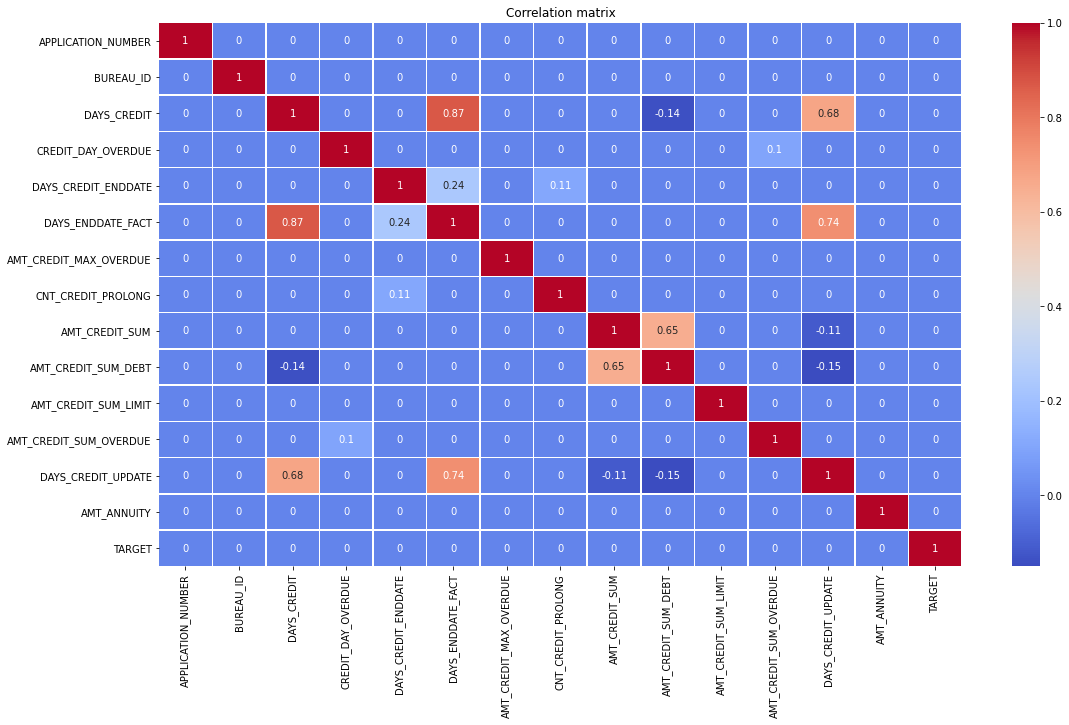

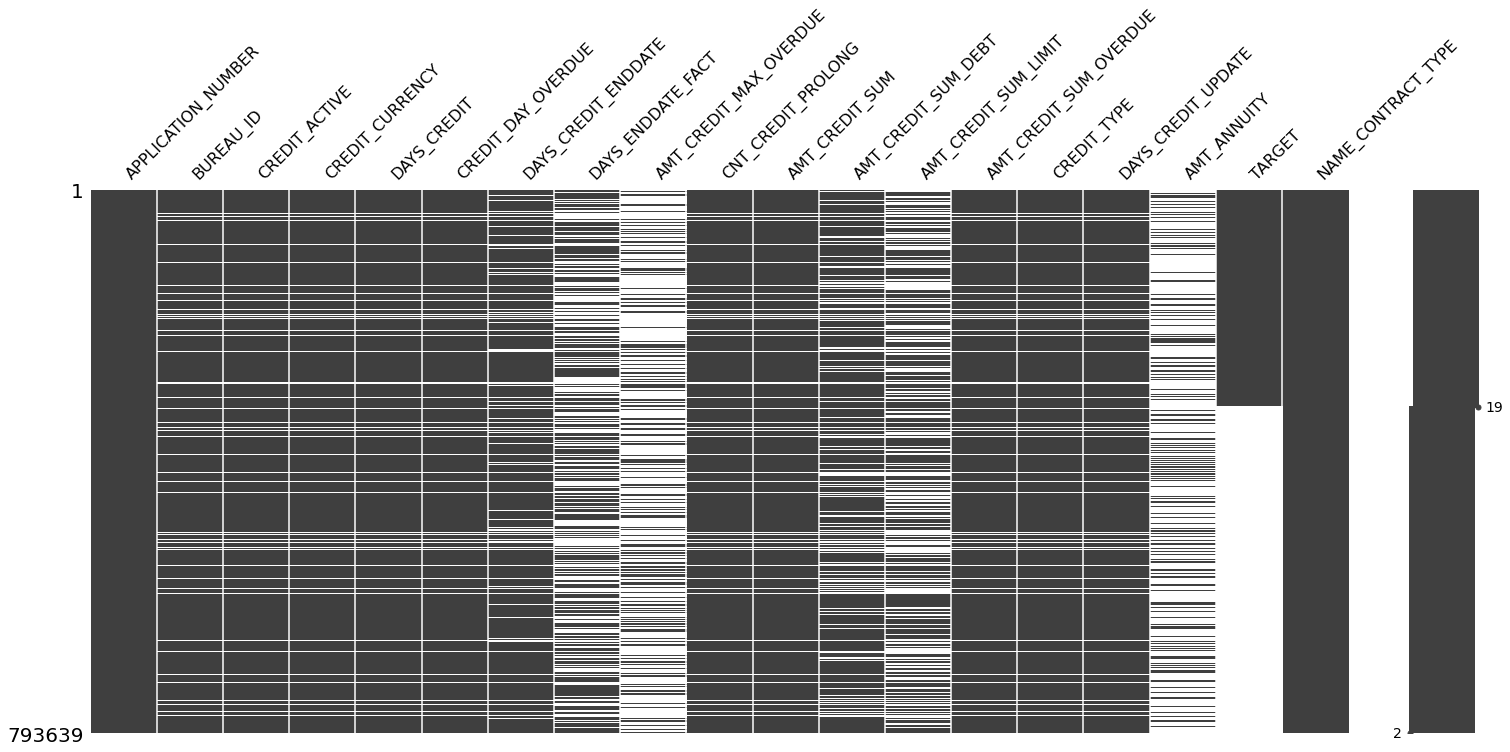

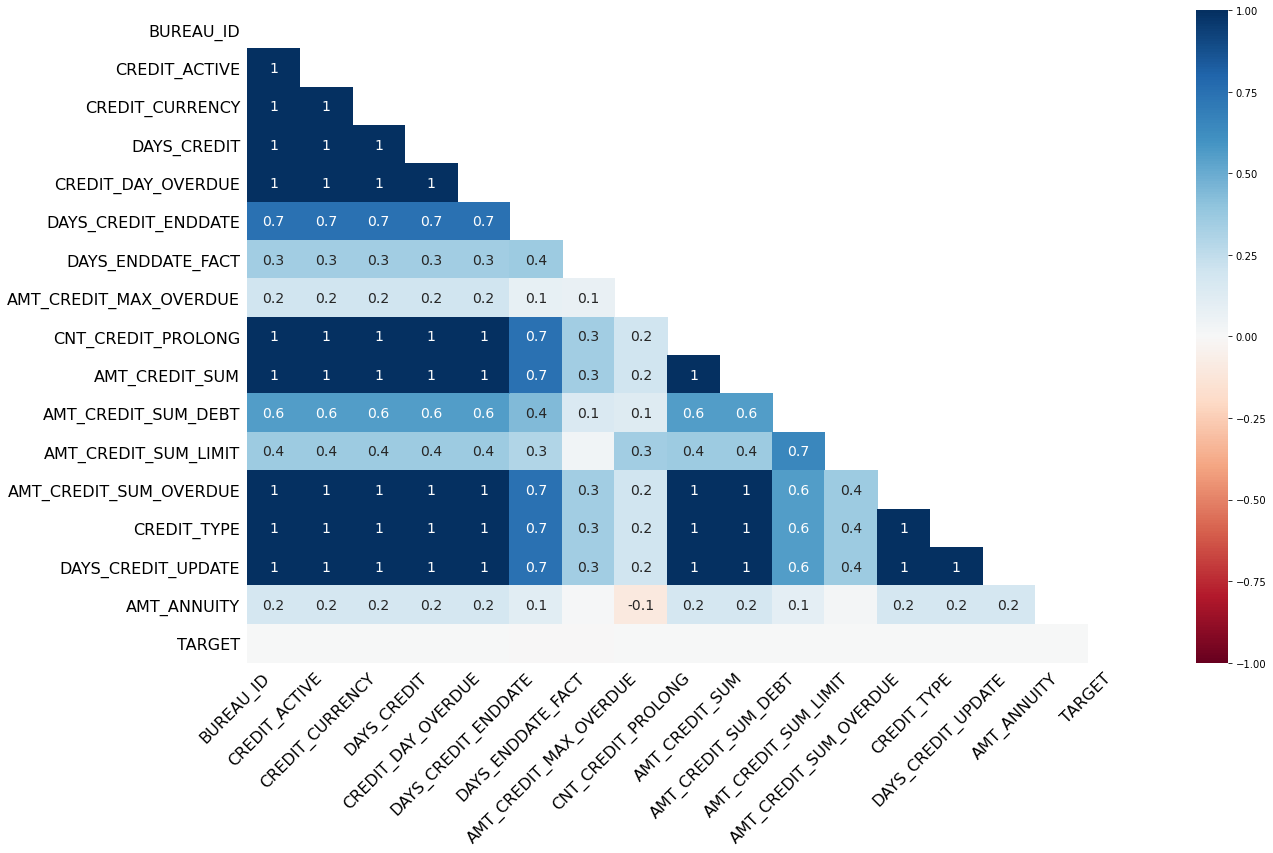

In [344]:
corr_matrix(bk)

Active    267924
Name: CREDIT_ACTIVE, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака CREDIT_ACTIVE в разрезе TARGET


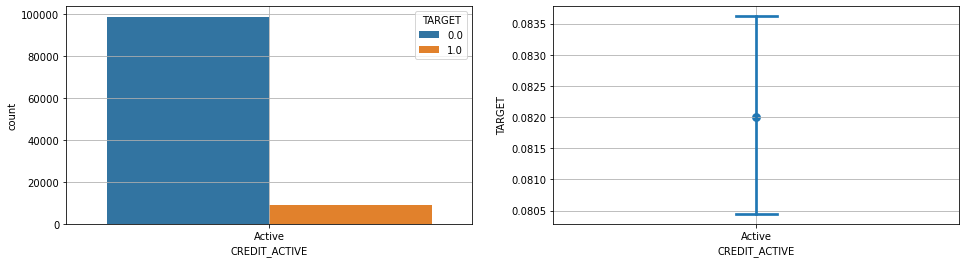

In [295]:
categorical_analysis('CREDIT_ACTIVE', bk)

currency 1    267860
currency 2        51
currency 3        13
Name: CREDIT_CURRENCY, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака CREDIT_CURRENCY в разрезе TARGET


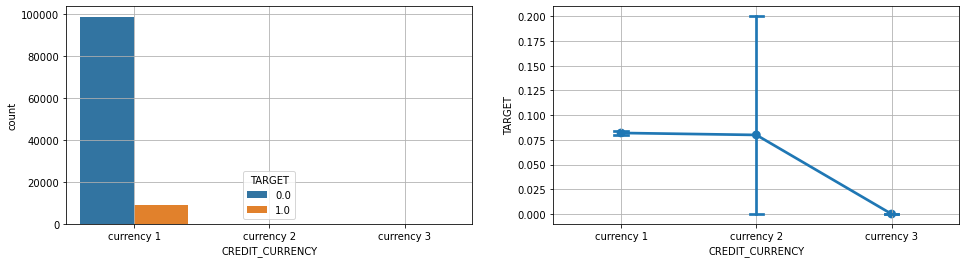

In [296]:
categorical_analysis('CREDIT_CURRENCY', bk)

nunique = 2923
NaN sum = 0
NaN % = 0.0
***************
Распределение признака DAYS_CREDIT в разрезе TARGET


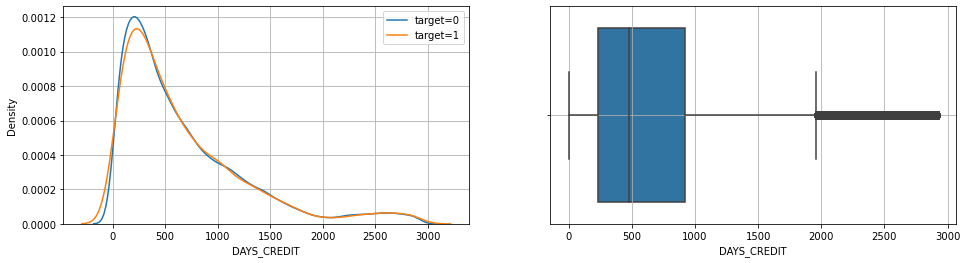

In [297]:
numerical_analysis('DAYS_CREDIT', bk)

nunique = 449
NaN sum = 0
NaN % = 0.0
***************
Распределение признака CREDIT_DAY_OVERDUE в разрезе TARGET


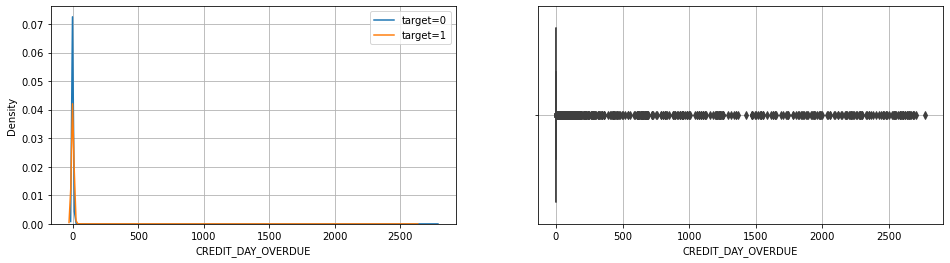

In [298]:
numerical_analysis('CREDIT_DAY_OVERDUE', bk)

nunique = 8988
NaN sum = 30912
NaN % = 11.54
***************
Распределение признака DAYS_CREDIT_ENDDATE в разрезе TARGET


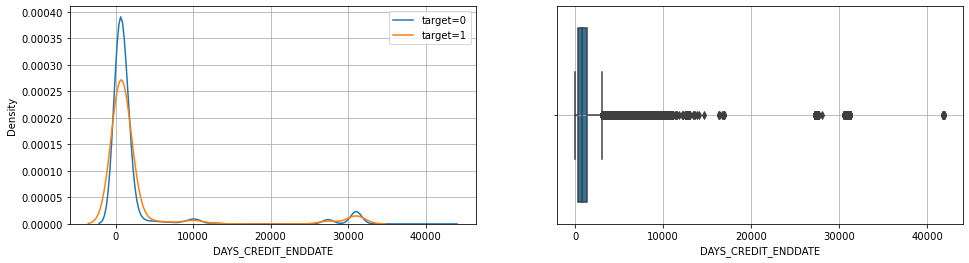

In [299]:
numerical_analysis('DAYS_CREDIT_ENDDATE', bk)

In [301]:
bk[bk['DAYS_CREDIT_ENDDATE']>30000]

,APPLICATION_NUMBER,BUREAU_ID,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET,NAME_CONTRACT_TYPE
53,123600510,5842651.0,Active,currency 1,1159.0,0.0,30915.0,NaN,NaN,0.0,135000.0,0.0,0.0,0.0,Credit card,18.0,NaN,0.0,Cash
68,123724887,5114747.0,Active,currency 1,752.0,0.0,30951.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Credit card,16.0,NaN,0.0,Cash
277,123461221,6224374.0,Active,currency 1,213.0,0.0,31155.0,NaN,NaN,0.0,562500.0,0.0,0.0,0.0,Credit card,27.0,NaN,0.0,Cash
283,123583774,6306480.0,Active,currency 1,161.0,0.0,30895.0,NaN,NaN,0.0,67500.0,0.0,NaN,0.0,Credit card,154.0,0.0,0.0,Cash
391,123534226,5263037.0,Active,currency 1,389.0,0.0,31073.0,NaN,NaN,0.0,162000.0,153247.5,NaN,0.0,Credit card,12.0,NaN,0.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793379,123533434,5295140.0,Active,currency 1,397.0,0.0,31169.0,NaN,NaN,0.0,76500.0,67662.0,NaN,0.0,Credit card,13.0,NaN,NaN,Cash
793391,123674081,5569034.0,Active,currency 1,489.0,0.0,31177.0,NaN,NaN,0.0,135000.0,20065.5,NaN,0.0,Credit card,12.0,NaN,NaN,Cash
793459,123572792,5134940.0,Active,currency 1,942.0,0.0,31087.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Credit card,27.0,NaN,NaN,Cash
793523,123557419,6151610.0,Active,currency 1,415.0,0.0,30978.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Credit card,17.0,NaN,NaN,Cash


nunique = 476
NaN sum = 267095
NaN % = 99.69
***************
Распределение признака DAYS_ENDDATE_FACT в разрезе TARGET


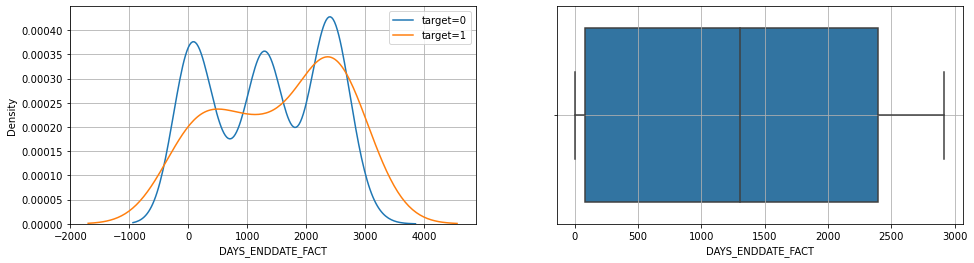

In [302]:
numerical_analysis('DAYS_ENDDATE_FACT', bk)

nunique = 14108
NaN sum = 174798
NaN % = 65.24
***************
Распределение признака AMT_CREDIT_MAX_OVERDUE в разрезе TARGET


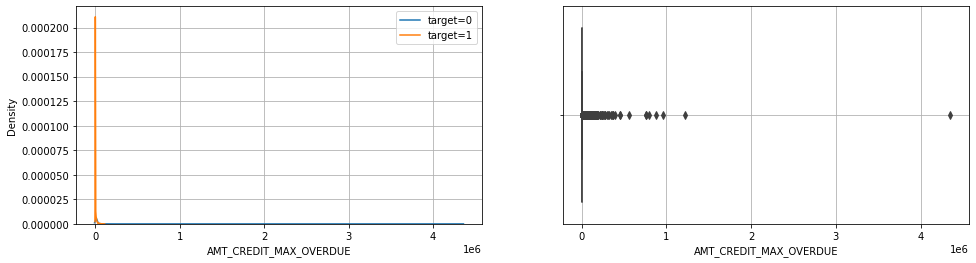

In [303]:
numerical_analysis('AMT_CREDIT_MAX_OVERDUE', bk)

nunique = 8
NaN sum = 0
NaN % = 0.0
***************
Распределение признака CNT_CREDIT_PROLONG в разрезе TARGET


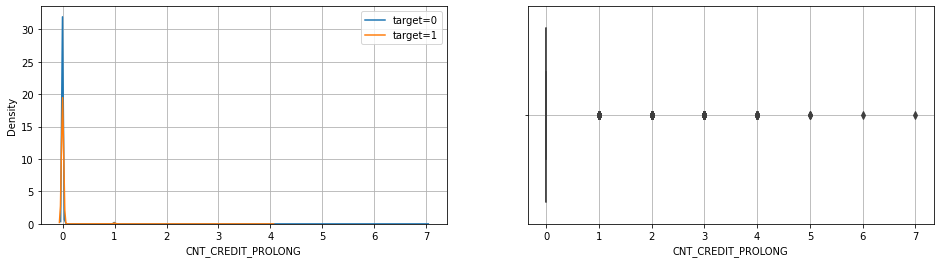

In [304]:
numerical_analysis('CNT_CREDIT_PROLONG', bk)

nunique = 47321
NaN sum = 2
NaN % = 0.0
***************
Распределение признака AMT_CREDIT_SUM в разрезе TARGET


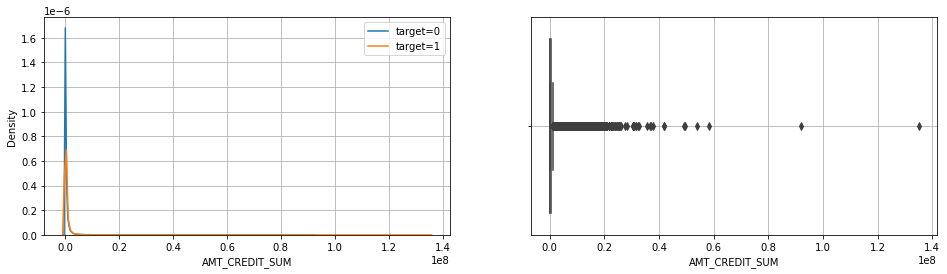

In [305]:
numerical_analysis('AMT_CREDIT_SUM', bk)

nunique = 122192
NaN sum = 31286
NaN % = 11.68
***************
Распределение признака AMT_CREDIT_SUM_DEBT в разрезе TARGET


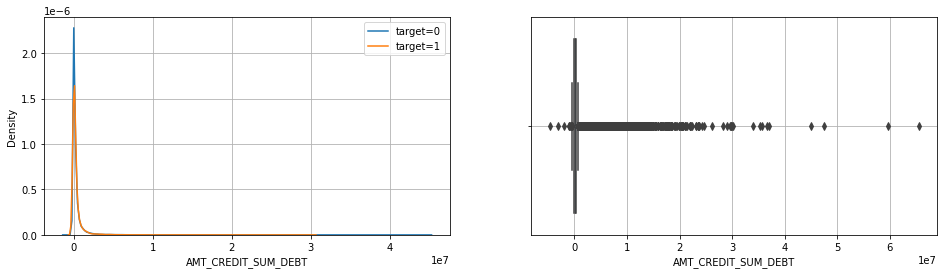

In [306]:
numerical_analysis('AMT_CREDIT_SUM_DEBT', bk)

nunique = 21825
NaN sum = 73664
NaN % = 27.49
***************
Распределение признака AMT_CREDIT_SUM_LIMIT в разрезе TARGET


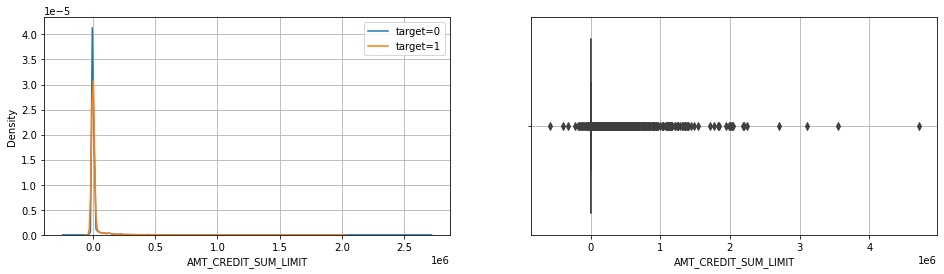

In [307]:
numerical_analysis('AMT_CREDIT_SUM_LIMIT', bk)

nunique = 776
NaN sum = 0
NaN % = 0.0
***************
Распределение признака AMT_CREDIT_SUM_OVERDUE в разрезе TARGET


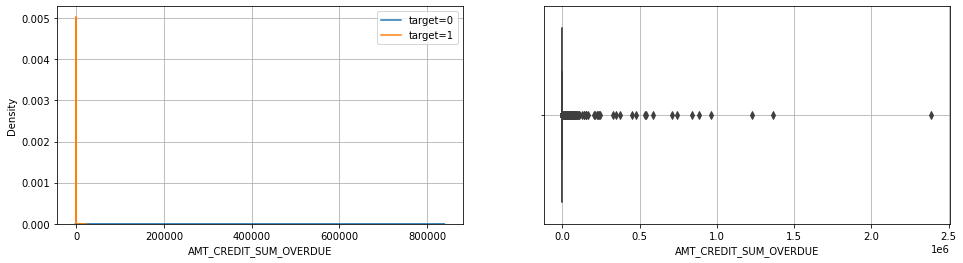

In [308]:
numerical_analysis('AMT_CREDIT_SUM_OVERDUE', bk)

Consumer credit                                 134763
Credit card                                     121789
Mortgage                                          5487
Car loan                                          4195
Microloan                                         1282
Loan for business development                      142
Another type of loan                                93
Loan for working capital replenishment              90
Unknown type of loan                                55
Cash loan (non-earmarked)                           18
Real estate loan                                     7
Loan for the purchase of equipment                   2
Loan for purchase of shares (margin lending)         1
Name: CREDIT_TYPE, dtype: int64
NaN sum = 0
NaN % = 0.0
***************
Распределение признака CREDIT_TYPE в разрезе TARGET


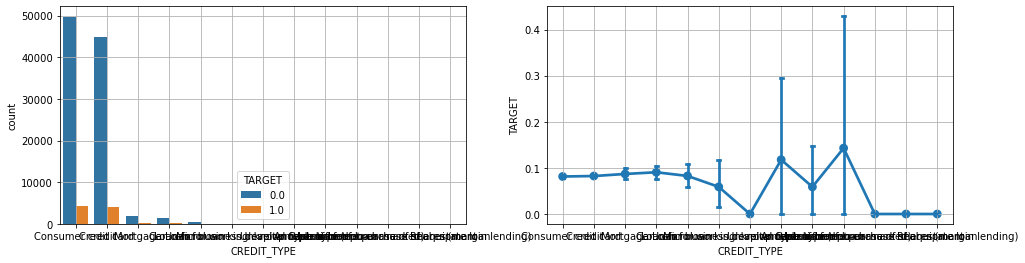

In [309]:
categorical_analysis('CREDIT_TYPE', bk)

nunique = 2674
NaN sum = 0
NaN % = 0.0
***************
Распределение признака DAYS_CREDIT_UPDATE в разрезе TARGET


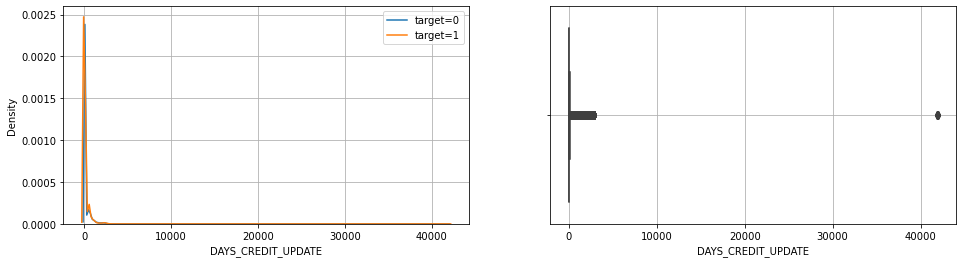

In [310]:
numerical_analysis('DAYS_CREDIT_UPDATE', bk)

nunique = 20160
NaN sum = 183315
NaN % = 68.42
***************
Распределение признака AMT_ANNUITY в разрезе TARGET


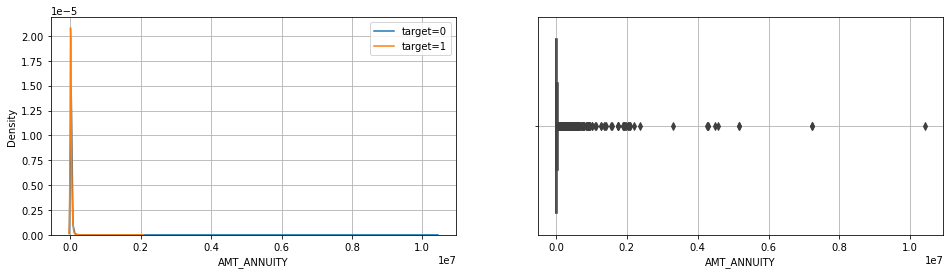

In [311]:
numerical_analysis('AMT_ANNUITY', bk)

# payments

In [312]:
py = payments.merge(data, how='right', on='APPLICATION_NUMBER')
print(py.shape)
py.head(3)

(861063, 10)


,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET,NAME_CONTRACT_TYPE
0,49796018.0,123687442,1.0,4.0,2830.0,2830.0,3289.635,3289.635,0.0,Cash
1,49796018.0,123687442,1.0,7.0,2740.0,2740.0,3289.635,3289.635,0.0,Cash
2,49713743.0,123687442,1.0,5.0,2551.0,2547.0,9262.215,9251.865,0.0,Cash


In [315]:
py['PREV_APPLICATION_NUMBER'].nunique()

405291

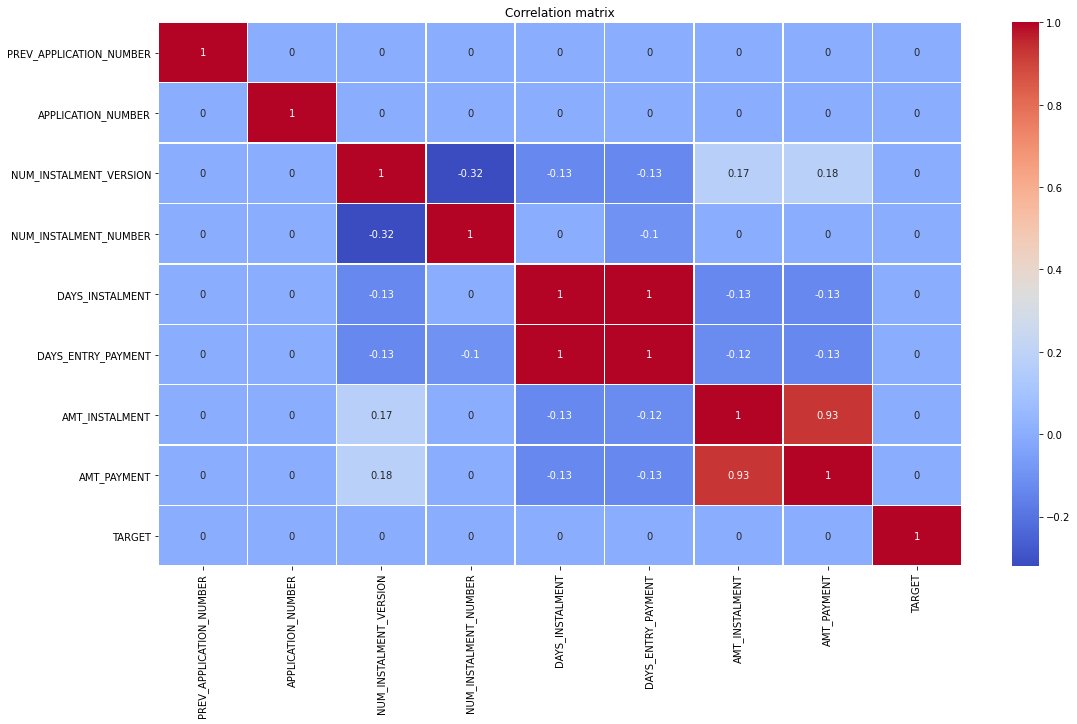

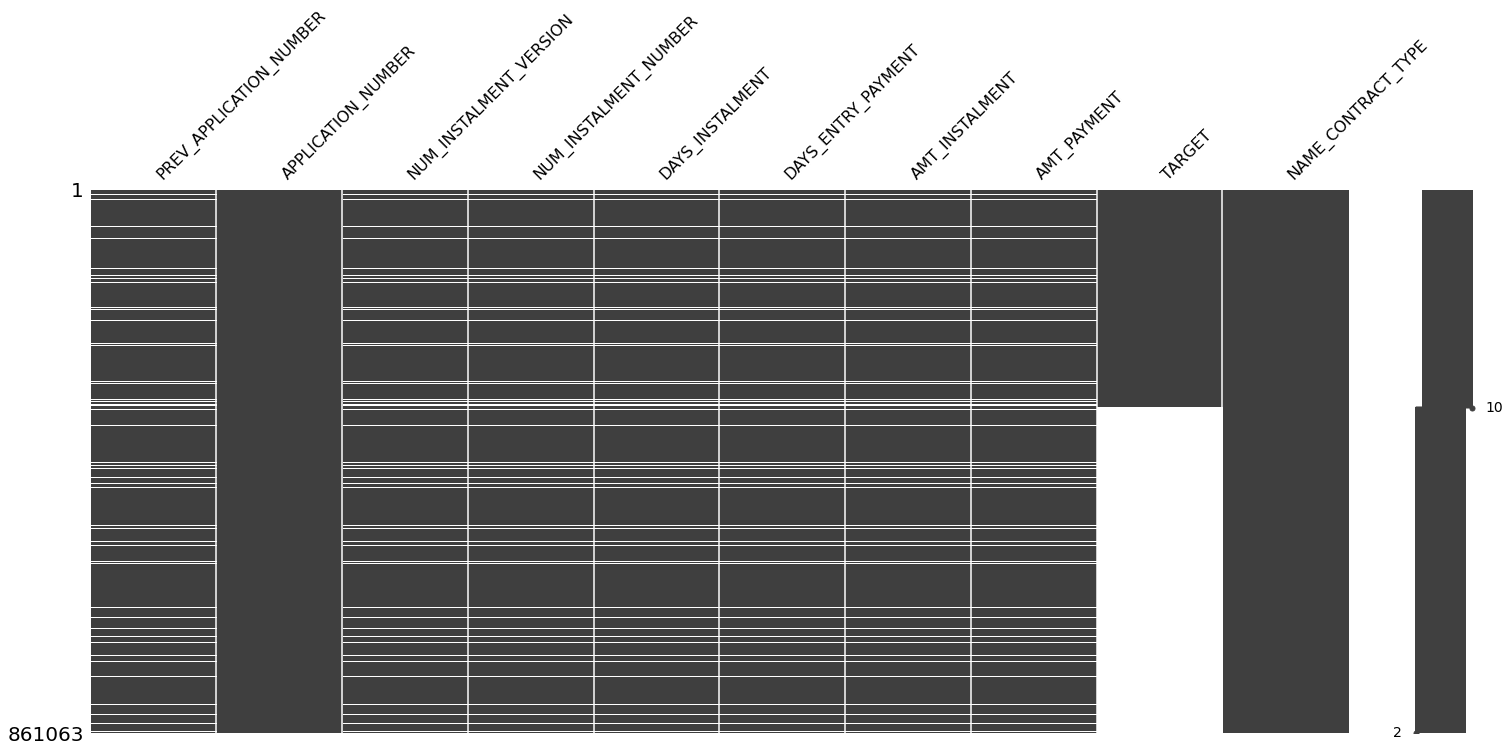

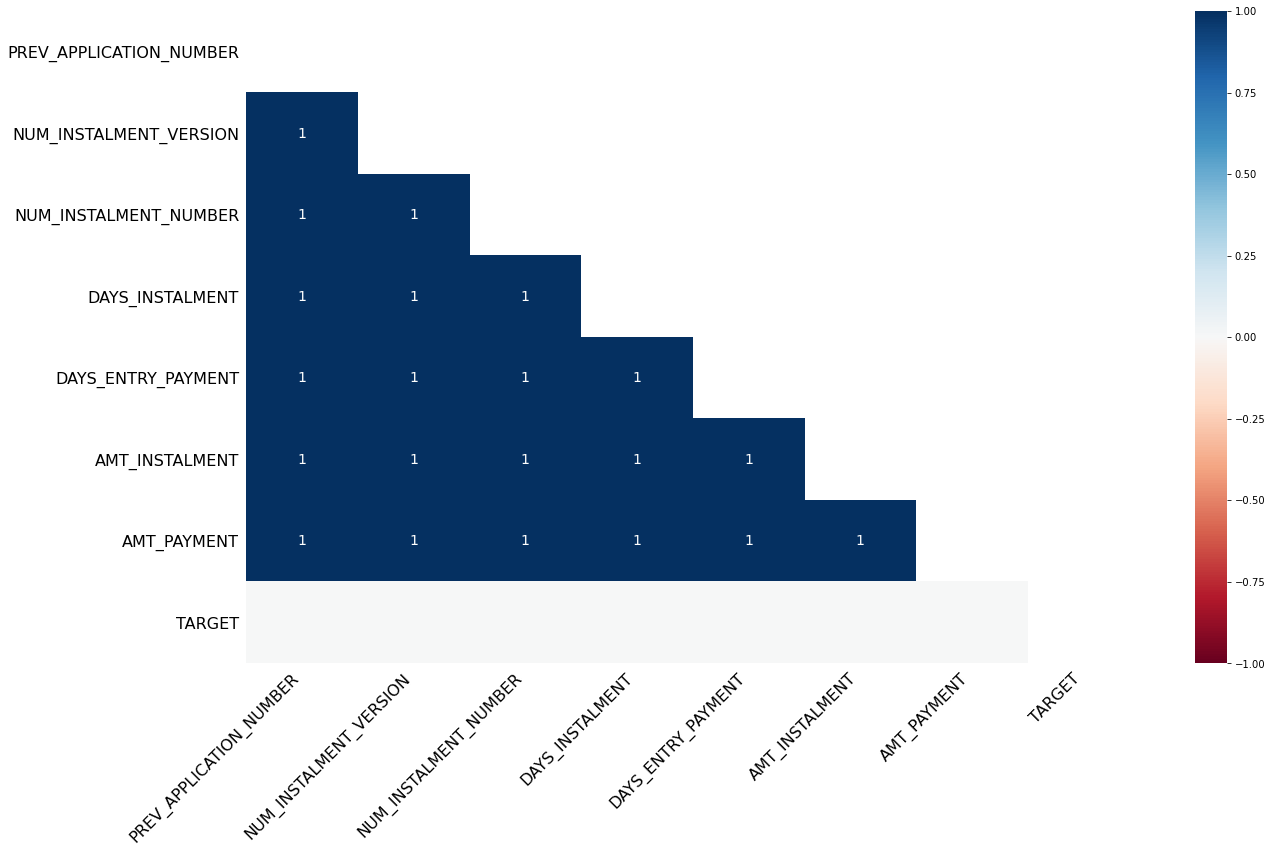

In [313]:
corr_matrix(py)

nunique = 44
NaN sum = 70694
NaN % = 8.21
***************
Распределение признака NUM_INSTALMENT_VERSION в разрезе TARGET


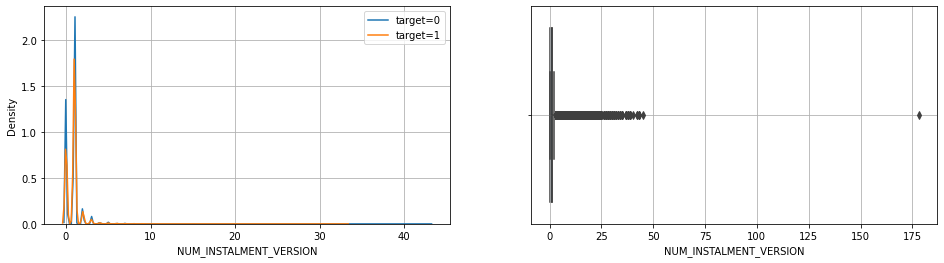

In [316]:
numerical_analysis('NUM_INSTALMENT_VERSION', py)

nunique = 235
NaN sum = 70694
NaN % = 8.21
***************
Распределение признака NUM_INSTALMENT_NUMBER в разрезе TARGET


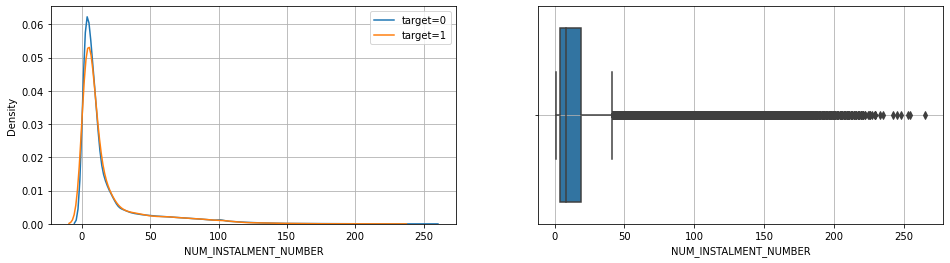

In [317]:
numerical_analysis('NUM_INSTALMENT_NUMBER', py)

nunique = 2921
NaN sum = 70694
NaN % = 8.21
***************
Распределение признака DAYS_INSTALMENT в разрезе TARGET


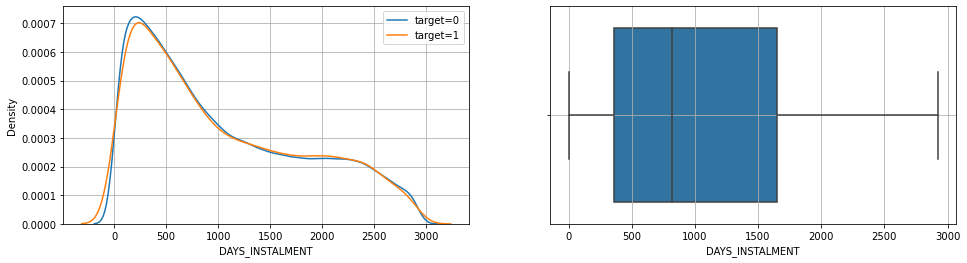

In [318]:
numerical_analysis('DAYS_INSTALMENT', py)

nunique = 2978
NaN sum = 70847
NaN % = 8.23
***************
Распределение признака DAYS_ENTRY_PAYMENT в разрезе TARGET


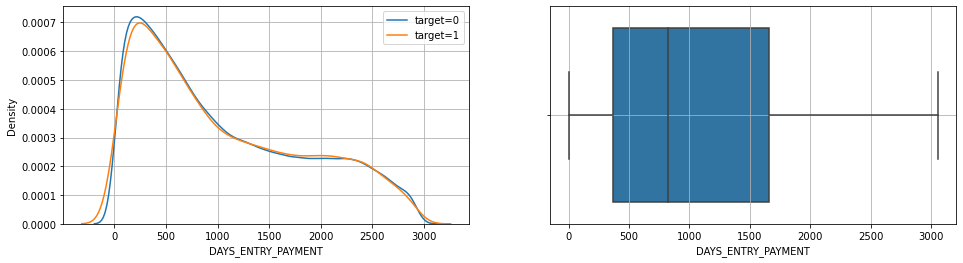

In [319]:
numerical_analysis('DAYS_ENTRY_PAYMENT', py)

nunique = 264464
NaN sum = 70694
NaN % = 8.21
***************
Распределение признака AMT_INSTALMENT в разрезе TARGET


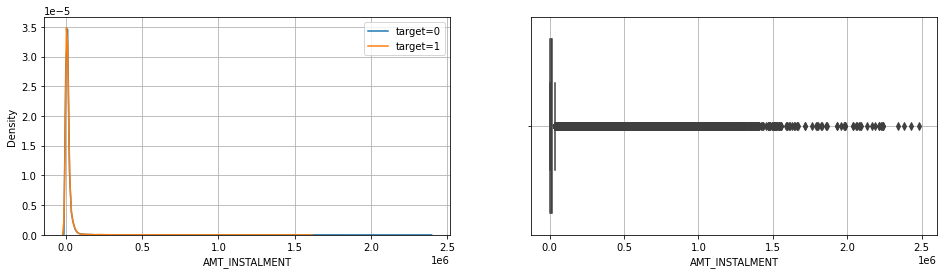

In [320]:
numerical_analysis('AMT_INSTALMENT', py)

nunique = 276679
NaN sum = 70847
NaN % = 8.23
***************
Распределение признака AMT_PAYMENT в разрезе TARGET


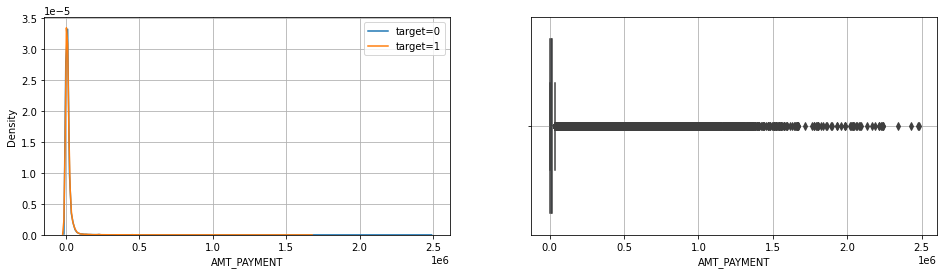

In [321]:
numerical_analysis('AMT_PAYMENT', py)